<center>

# <span style="color:#FF5733;">Analyse de Données & Prédiction de la Survie des patients </span>
## <span style="color:#FFC300;">ECE - École Polytechnique de Turin</span>
### <span style="color:#FF5733;">Projet Machine Learning, A.A. 2023/2024</span>

</center>



## <div style="text-align: left; background-color:aliceblue ; font-family: Jokerman; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Importation des bibliothèques requises </div> 

In [4]:
import os # File system manangement
import time
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
from time import time
import plotly.express as px
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# visulisation des données
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import plotly.graph_objects as go
import plotly.graph_objects as go
import plotly.figure_factory as ff

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# Sklearn processing
from collections import Counter
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import MinMaxScaler,StandardScaler, OneHotEncoder,LabelEncoder,RobustScaler
from sklearn.model_selection import  StratifiedShuffleSplit,ShuffleSplit,RepeatedStratifiedKFold,StratifiedKFold
from sklearn.model_selection import StratifiedKFold, cross_val_predict,GroupKFold
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import AdaBoostClassifier

# for model evaluation
import time
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import ShuffleSplit,cross_val_score,train_test_split
from sklearn.model_selection import StratifiedKFold,StratifiedShuffleSplit, KFold ,RepeatedKFold, RepeatedStratifiedKFold

# sklearn Algoritm of Machine Learning algorithms
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
#from lightgbm import LGBMClassifier
#from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier,AdaBoostClassifier

## <div style="text-align: left; background-color:aliceblue ; font-family: Jokerman; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;">  Chargement du jeu de données </div> 

In [5]:
# Spécifie le chemin du fichier CSV contenant les données 
Path_dev = "/Users/surelmanda/Downloads/AirGUARD/Babelle Project/2024_summer_session/development.csv"
Path_ev = "/Users/surelmanda/Downloads/AirGUARD/Babelle Project/2024_summer_session/evaluation.csv"

data_dev = pd.read_csv(Path_dev, sep=',')
data_ev = pd.read_csv(Path_ev, sep=',')
data_ev['death'] = -100
data = pd.concat([data_dev, data_ev], ignore_index=True)
# Affiche les premières lignes du jeu de données pour obtenir un aperçu initial des données.
display(data.head())

,age,sex,dzgroup,dzclass,num.co,edu,income,scoma,charges,totcst,...,sod,ph,glucose,bun,urine,adlp,adls,adlsc,death,Id
0,44.32599,male,CHF,COPD/CHF/Cirrhosis,2,14.0,under $11k,0.0,44950.0,23775.2188,...,129.0,NaN,154.0,51.0,2650.0,0.0,0.0,0.00000,1,0
1,78.39600,male,COPD,COPD/CHF/Cirrhosis,2,14.0,$25-$50k,0.0,11293.0,8076.2969,...,133.0,7.369141,NaN,NaN,NaN,NaN,NaN,3.44873,1,1
2,32.44098,male,ARF/MOSF w/Sepsis,ARF/MOSF,1,11.0,NaN,37.0,1273347.0,633212.0000,...,143.0,7.509766,NaN,NaN,NaN,NaN,7.0,7.00000,1,2
3,74.93994,male,ARF/MOSF w/Sepsis,ARF/MOSF,0,8.0,$11-$25k,9.0,48671.0,31515.9844,...,137.0,7.399414,146.0,25.0,1000.0,NaN,0.0,0.00000,0,3
4,61.67599,male,Colon Cancer,Cancer,1,8.0,$11-$25k,0.0,2958.0,1935.3555,...,137.0,7.469727,383.0,101.0,1040.0,NaN,7.0,7.00000,1,4


In [6]:
# Affiche les dernieres lignes du jeu de données pour obtenir un aperçu initial des données.
display(data.tail())

,age,sex,dzgroup,dzclass,num.co,edu,income,scoma,charges,totcst,...,sod,ph,glucose,bun,urine,adlp,adls,adlsc,death,Id
9100,73.90295,male,CHF,COPD/CHF/Cirrhosis,2,16.0,NaN,0.0,6676.000,4164.0781,...,137.0,NaN,NaN,NaN,NaN,NaN,NaN,2.252441,-100,1816
9101,67.34595,female,Coma,Coma,0,11.0,under $11k,94.0,67080.000,44024.9062,...,143.0,7.459961,74.0,26.0,1100.0,NaN,1.0,1.000000,-100,1817
9102,57.06998,female,Lung Cancer,Cancer,1,12.0,$25-$50k,0.0,40442.000,NaN,...,139.0,7.369141,158.0,101.0,960.0,0.0,0.0,0.000000,-100,1818
9103,63.89899,female,ARF/MOSF w/Sepsis,ARF/MOSF,2,4.0,under $11k,0.0,68388.125,44266.1875,...,129.0,7.469727,NaN,NaN,NaN,NaN,0.0,0.000000,-100,1819
9104,75.09698,male,ARF/MOSF w/Sepsis,ARF/MOSF,0,8.0,$11-$25k,0.0,41196.000,27988.9375,...,145.0,7.549805,NaN,NaN,NaN,NaN,NaN,2.090332,-100,1820


## <div style="text-align: left; background-color:aliceblue ; font-family: Jokerman; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Analyse du dataset </div> 

In [7]:
def resume_inspection_colonnes(data_frame):
    """
    Une fonction utilitaire qui fournit un résumé plus complet des colonnes du dataframe
    que les méthodes intégrées df.info() et df.describe().
    """
    
    total_lignes = len(data_frame)
    resume = pd.DataFrame({
        'Total Lignes': [total_lignes] * data_frame.shape[1],  # Nombre total de lignes dans le dataframe
        'Lignes avec Valeurs Manquantes': data_frame.isnull().sum(),  # Nombre de lignes avec des valeurs manquantes
        'Toutes les Valeurs Uniques': data_frame.nunique() == total_lignes,  # Vérifie si toutes les valeurs sont uniques dans chaque colonne
        'Cardinalité': data_frame.nunique(),  # Nombre de valeurs uniques dans chaque colonne
        'Contient des Valeurs Null': data_frame.isna().any(),  # Indique si la colonne contient des valeurs nulles
        'Pourcentage de Null': round((data_frame.isnull().sum() / total_lignes) * 100, 2),  # Pourcentage de valeurs nulles par rapport au total des lignes
        'Types de Données': data_frame.dtypes,  # Types de données de chaque colonne
        'Spécimens': data_frame.sample(2).T.values.tolist()  # Échantillons aléatoires de 5 lignes pour donner un aperçu des données
    })
    return resume

In [8]:
resultat_summary = resume_inspection_colonnes(data)
display(resultat_summary)

,Total Lignes,Lignes avec Valeurs Manquantes,Toutes les Valeurs Uniques,Cardinalité,Contient des Valeurs Null,Pourcentage de Null,Types de Données,Spécimens
age,9105,0,False,7323,False,0.00,float64,"[71.91797, 32.13998]"
sex,9105,0,False,2,False,0.00,object,"[male, male]"
dzgroup,9105,0,False,8,False,0.00,object,"[ARF/MOSF w/Sepsis, MOSF w/Malig]"
dzclass,9105,0,False,4,False,0.00,object,"[ARF/MOSF, ARF/MOSF]"
num.co,9105,0,False,10,False,0.00,int64,"[1, 2]"
edu,9105,1634,False,31,True,17.95,float64,"[9.0, nan]"
income,9105,2982,False,4,True,32.75,object,"[under $11k, nan]"
scoma,9105,1,False,11,True,0.01,float64,"[61.0, 0.0]"
charges,9105,172,False,8501,True,1.89,float64,"[84830.938, 256835.0]"
totcst,9105,888,False,8197,True,9.75,float64,"[58373.6875, 123820.938]"


#### 1. Calcul de la Dimension du Jeu de Données

In [9]:
# Affiche le nombre de lignes et de colonnes dans le jeu de données pour donner une première vue d'ensemble.
print("Le jeu de données d'entrée comporte {} lignes et {} colonnes".format(len(data), len(data.columns)))

Le jeu de données d'entrée comporte 9105 lignes et 44 colonnes


<div style="border-radius:10px; border:#808080 dashed; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Conclusion :</font></h3>

* Il y a un total de **9105 enregistrements** et **44 colonnes** disponibles dans le train_dataset.


#### 2. Résumé statistique du jeu de données  
* Calcul du nombre total de valeurs manquantes et du pourcentage de valeurs manquantes.

In [10]:
# Crée un DataFrame pour donner un aperçu des données de la DataFrame originale, colonne par colonne.
def creer_apercu_dataframe(data):
    '''
    Crée un DataFrame pour donner un aperçu des données de la DataFrame originale, colonne par colonne.
    Chaque ligne résultante fournit des informations sur chaque colonne :
    - type de données
    - spécimen de données
    - nombre de valeurs uniques
    - part des valeurs manquantes
    
    Args:
        data (DataFrame): La DataFrame avec laquelle travailler.
        
    Returns:
        DataFrame résultant        
    '''
    
    cols, dtype_col, specimens, nunique, null_share = [], [], [], [], []
    for column in data:
        cols.append(column)
        
        # Obtient le type de données de la colonne
        this_dtype = data[column].dtype
        dtype_col.append(this_dtype)
        
        # Obtient un spécimen de données de la colonne
        specimen = data.loc[data[column].first_valid_index(), column]
        specimens.append(specimen)
        
        # Obtient le nombre de valeurs uniques dans la colonne
        nunique.append(data[column].nunique())
        
        # Calcule la part des valeurs manquantes dans la colonne
        null_sum = data[column].isna().sum()
        null_to_len = null_sum / len(data[column])
        null_share.append(f'{null_to_len:.2%}')
        
    # Crée un DataFrame avec les informations collectées
    df = pd.DataFrame(list(zip(dtype_col,
                               specimens,
                               nunique,
                              null_share)),
                      index=cols)    
    df.columns=['dtype',
                'specimen',
                'Total No. unique Values',
               '% of Missing Values']
 
    return df


In [11]:
creer_apercu_dataframe(data)

,dtype,specimen,Total No. unique Values,% of Missing Values
age,float64,44.32599,7323,0.00%
sex,object,male,2,0.00%
dzgroup,object,CHF,8,0.00%
dzclass,object,COPD/CHF/Cirrhosis,4,0.00%
num.co,int64,2,10,0.00%
edu,float64,14.0,31,17.95%
income,object,under $11k,4,32.75%
scoma,float64,0.0,11,0.01%
charges,float64,44950.0,8501,1.89%
totcst,float64,23775.2188,8197,9.75%


<div style="border-radius:10px; border:#808080 dashed; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Observations sur le Jeu de Données ( A modifier ):</font></h3>

<p align="left">
    <strong>Observation 1:</strong> Aucune des attributs ne comporte de valeurs manquantes.
</p>

<p align="left">
    <strong>Observation 2:</strong> Le jeu de données se compose de 9 colonnes, pouvant être réparties en deux groupes distincts :
</p>

1. **Colonnes de Type Catégorique :** avec un type de données object
2. **Colonnes de Type Numérique :** avec un type de données float

<p align="left">
    <strong>Observation 3:</strong> Certaines colonnes présentent un faible nombre de valeurs distinctes.
</p>
    
<p align="left">
    <strong>Observation 4:</strong> La colonne cible "Quality" contient 2 categories différentes de classe.
</p>

<p align="left">
    <strong>Observation 5:</strong> La colonne 'Acidity' a un type de données 'object' qui ne reflète pas correctement son contenu réel.
</p>

#### 4. Controle des valeur manquantes dans le dataset

In [12]:
def visualize_nan_values(dataset):
    # Calculer le nombre de valeurs NaN et leur pourcentage pour chaque colonne
    nan_counts = dataset.isnull().sum()
    total_values = len(dataset)
    nan_percentage = (nan_counts / total_values) * 100
    
    # Créer un DataFrame avec les informations sur les valeurs NaN
    nan_info = pd.DataFrame({'Column': nan_counts.index, 'NaN Count': nan_counts.values, 'NaN Percentage': nan_percentage.values})
    
    # Visualiser les informations avec Plotly Express
    fig = px.bar(nan_info, x='Column', y='NaN Count', text='NaN Count', title='Nombre de valeurs NaN par colonne',
                 labels={'NaN Count': 'Nombre de valeurs NaN', 'Column': 'Colonne'}, color='Column')
    fig.update_traces(texttemplate='%{text}', textposition='outside')
    fig.update_layout(barmode='stack')

    # Afficher le graphique des barres seulement
    return fig


In [13]:
def visualize_missing_values(data, threshold):
    # Calculer le nombre de valeurs manquantes par colonne
    missing_values = data.isnull().sum()
    
    # Filtrer les colonnes avec des valeurs manquantes inférieures au seuil
    columns_to_keep = missing_values[missing_values < threshold]
    columns_to_drop = missing_values[missing_values >= threshold]
    
    # Visualiser le nombre de valeurs manquantes pour chaque colonne à garder
    fig = go.Figure(data=[
        go.Bar(name='Missing Values', x=columns_to_keep.index, y=columns_to_keep.values)
    ])
    fig.update_layout(
        title='Nombre de valeurs manquantes par colonne',
        xaxis_title='Colonnes',
        yaxis_title='Nombre de valeurs manquantes',
        xaxis_tickangle=-45
    )
    fig.show()
    
    # Drop les colonnes avec trop de valeurs manquantes
    data_dropped = data.drop(columns=columns_to_drop.index)
    
    return columns_to_drop.index.tolist(), data_dropped

In [14]:
visualize_nan_values(data)

In [15]:
threshold = 800.00
columns_to_drop, filtered_data = visualize_missing_values(data, threshold)
print("Colonnes à supprimer :", columns_to_drop)
filtered_data.head()

Colonnes à supprimer : ['edu', 'income', 'totcst', 'totmcst', 'prg2m', 'prg6m', 'pafi', 'alb', 'bili', 'ph', 'glucose', 'bun', 'urine', 'adlp', 'adls']


,age,sex,dzgroup,dzclass,num.co,scoma,charges,avtisst,race,sps,...,meanbp,wblc,hrt,resp,temp,crea,sod,adlsc,death,Id
0,44.32599,male,CHF,COPD/CHF/Cirrhosis,2,0.0,44950.0,14.333328,black,32.398438,...,73.0,4.899414,95.0,26.0,37.50000,2.599609,129.0,0.00000,1,0
1,78.39600,male,COPD,COPD/CHF/Cirrhosis,2,0.0,11293.0,15.500000,white,18.898438,...,124.0,5.599609,114.0,24.0,36.59375,1.199951,133.0,3.44873,1,1
2,32.44098,male,ARF/MOSF w/Sepsis,ARF/MOSF,1,37.0,1273347.0,38.500000,white,32.296875,...,51.0,16.699219,96.0,30.0,37.39844,0.699951,143.0,7.00000,1,2
3,74.93994,male,ARF/MOSF w/Sepsis,ARF/MOSF,0,9.0,48671.0,24.500000,white,25.398438,...,79.0,12.099609,40.0,15.0,35.59375,1.199951,137.0,0.00000,0,3
4,61.67599,male,Colon Cancer,Cancer,1,0.0,2958.0,15.000000,black,34.398438,...,105.0,9.298828,135.0,6.0,35.79688,5.099609,137.0,7.00000,1,4


In [16]:
def impute_missing_values(df, impute_numeric=True, impute_categorical=True):
    # Imputation par la moyenne des variables numériques
    if impute_numeric:
        numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
        for col in numeric_cols:
            if df[col].isnull().any():
                imputer_mean = SimpleImputer(strategy='mean')
                df[[col]] = imputer_mean.fit_transform(df[[col]])
    
    # Imputation par le mode des valeurs catégorielles
    if impute_categorical:
        categorical_cols = df.select_dtypes(include=['object']).columns
        for col in categorical_cols:
            if df[col].isnull().any():
                imputer_mode = SimpleImputer(strategy='most_frequent')
                df[[col]] = imputer_mode.fit_transform(df[[col]])
    
    # Vérifiez qu'il n'y a plus de valeurs manquantes
    if df.isnull().sum().sum() == 0:
        print("Il n'y a plus de valeurs manquantes dans le dataset.")
    else:
        print("Il reste des valeurs manquantes dans le dataset.")
    
    return df

In [17]:
data_clean = impute_missing_values(data.copy(), impute_numeric=True, impute_categorical=True)
display(data_clean.head())

Il n'y a plus de valeurs manquantes dans le dataset.


,age,sex,dzgroup,dzclass,num.co,edu,income,scoma,charges,totcst,...,sod,ph,glucose,bun,urine,adlp,adls,adlsc,death,Id
0,44.32599,male,CHF,COPD/CHF/Cirrhosis,2,14.0,under $11k,0.0,44950.0,23775.2188,...,129.0,7.415364,154.000000,51.000000,2650.000000,0.00000,0.000000,0.00000,1,0
1,78.39600,male,COPD,COPD/CHF/Cirrhosis,2,14.0,$25-$50k,0.0,11293.0,8076.2969,...,133.0,7.369141,159.873398,32.349463,2191.546047,1.15791,1.637384,3.44873,1,1
2,32.44098,male,ARF/MOSF w/Sepsis,ARF/MOSF,1,11.0,under $11k,37.0,1273347.0,633212.0000,...,143.0,7.509766,159.873398,32.349463,2191.546047,1.15791,7.000000,7.00000,1,2
3,74.93994,male,ARF/MOSF w/Sepsis,ARF/MOSF,0,8.0,$11-$25k,9.0,48671.0,31515.9844,...,137.0,7.399414,146.000000,25.000000,1000.000000,1.15791,0.000000,0.00000,0,3
4,61.67599,male,Colon Cancer,Cancer,1,8.0,$11-$25k,0.0,2958.0,1935.3555,...,137.0,7.469727,383.000000,101.000000,1040.000000,1.15791,7.000000,7.00000,1,4


<div style="border-radius:10px; border:#808080 dashed; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Observations sur le Jeu de Données:</font></h3>

* le jeu de données présente un une valeur manquante dans tous les colonnes sauf dans la colonne Acidity, donc nous allons retiré ces lignes. 

In [18]:
resultat_summary = resume_inspection_colonnes(data_clean)
display(resultat_summary)

,Total Lignes,Lignes avec Valeurs Manquantes,Toutes les Valeurs Uniques,Cardinalité,Contient des Valeurs Null,Pourcentage de Null,Types de Données,Spécimens
age,9105,0,False,7323,False,0.0,float64,"[36.70099, 71.00897]"
sex,9105,0,False,2,False,0.0,object,"[female, male]"
dzgroup,9105,0,False,8,False,0.0,object,"[Coma, MOSF w/Malig]"
dzclass,9105,0,False,4,False,0.0,object,"[Coma, ARF/MOSF]"
num.co,9105,0,False,10,False,0.0,int64,"[3, 1]"
edu,9105,0,False,32,False,0.0,float64,"[14.0, 6.0]"
income,9105,0,False,4,False,0.0,object,"[$11-$25k, under $11k]"
scoma,9105,0,False,12,False,0.0,float64,"[100.0, 44.0]"
charges,9105,0,False,8502,False,0.0,float64,"[139607.0, 85068.0]"
totcst,9105,0,False,8198,False,0.0,float64,"[32443.6719, 30825.86776844347]"


In [19]:
def categorize_columns_by_distinct_values(data, max_distinct_values):
    """
    Catégorise les colonnes catégorielles en deux listes en fonction du nombre de valeurs distinctes.

    Paramètres:
    data (DataFrame): Le DataFrame contenant les données.
    max_distinct_values (int): Le nombre maximal de valeurs distinctes pour classer une colonne.

    Retours:
    tuple: Deux listes de tuples, la première contenant les colonnes avec des valeurs distinctes
           inférieures ou égales à max_distinct_values, et la seconde contenant les colonnes avec
           des valeurs distinctes supérieures à max_distinct_values.
    """
    # Liste des colonnes de type 'object', excluant les colonnes 'Id' et 'death'
    categorical_columns = [col for col in data.select_dtypes(include=['object']).columns if col not in ['Id', 'death']]
    
    # Listes pour stocker les colonnes selon le nombre de valeurs distinctes
    columns_with_max_distinct_values = []
    columns_with_more_than_max_distinct_values = []

    # Itération sur chaque colonne catégorielle
    for column in categorical_columns:
        # Nombre de valeurs distinctes dans la colonne
        unique_values_count = data[column].nunique()
        
        # Classer la colonne dans la liste appropriée en fonction du nombre de valeurs distinctes
        if unique_values_count <= max_distinct_values:
            columns_with_max_distinct_values.append((column, unique_values_count))
        else:
            columns_with_more_than_max_distinct_values.append((column, unique_values_count))

    # Retourner les deux listes de colonnes
    return columns_with_max_distinct_values, columns_with_more_than_max_distinct_values

def one_hot_encode_columns(data, max_distinct_values):
    """
    Extrait les colonnes catégorielles avec un nombre de valeurs distinctes inférieur ou égal à max_distinct_values
    et applique un encodage one-hot sur ces colonnes.

    Paramètres:
    data (DataFrame): Le DataFrame contenant les données.
    max_distinct_values (int): Le nombre maximal de valeurs distinctes pour classer une colonne.

    Retours:
    DataFrame: Le DataFrame avec les colonnes encodées en one-hot.
    """
    # Catégoriser les colonnes en fonction du nombre de valeurs distinctes
    cols_max, cols_more = categorize_columns_by_distinct_values(data_clean, max_distinct_values)
    print("Colonnes avec max_distinct_values ou moins:", cols_max)
    print("Colonnes avec plus que max_distinct_values:", cols_more)
    
    # Extraire les noms des colonnes de cols_max
    columns_to_encode = [col for col, _ in cols_max]

    # Appliquer l'encodage one-hot
    encoder = OneHotEncoder(sparse_output=False, drop='first')  # sparse=False pour obtenir un DataFrame
    encoded_data = pd.DataFrame(encoder.fit_transform(data[columns_to_encode]), columns=encoder.get_feature_names_out(columns_to_encode))

    # Supprimer les colonnes d'origine et ajouter les colonnes encodées
    data = data.drop(columns=columns_to_encode).reset_index(drop=True)
    data = pd.concat([data, encoded_data], axis=1)
    
    return data

In [20]:
max_distinct_values = 15
encoded_data = one_hot_encode_columns(data_clean.copy(), max_distinct_values)
display(encoded_data.head())

Colonnes avec max_distinct_values ou moins: [('sex', 2), ('dzgroup', 8), ('dzclass', 4), ('income', 4), ('race', 5), ('ca', 3), ('dnr', 3)]
Colonnes avec plus que max_distinct_values: []


,age,num.co,edu,scoma,charges,totcst,totmcst,avtisst,sps,aps,...,income_>$50k,income_under $11k,race_black,race_hispanic,race_other,race_white,ca_no,ca_yes,dnr_dnr before sadm,dnr_no dnr
0,44.32599,2,14.0,0.0,44950.0,23775.2188,24613.296900,14.333328,32.398438,40.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,78.39600,2,14.0,0.0,11293.0,8076.2969,7590.226560,15.500000,18.898438,43.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,32.44098,1,11.0,37.0,1273347.0,633212.0000,28828.877838,38.500000,32.296875,44.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
3,74.93994,0,8.0,9.0,48671.0,31515.9844,33310.156200,24.500000,25.398438,35.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4,61.67599,1,8.0,0.0,2958.0,1935.3555,1559.000000,15.000000,34.398438,44.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [21]:
# Supprimer la colonne 'death'
data_trasform = encoded_data.copy()
data_trasform.drop(columns=['death'],inplace=True)
data_trasform['death']=encoded_data['death']


In [22]:
def split_dataset_by_death_column(data):
    """
    Sépare un DataFrame en deux ensembles (dev et ev) en fonction de la colonne 'death'.

    Paramètres:
    data (DataFrame): Le DataFrame contenant les données.

    Retours:
    tuple: Deux DataFrames, le premier contenant les données où 'death' est différent de -100 (dev),
           et le second contenant les données où 'death' est égal à -100 (ev).
    """
    # Filtrer les lignes où 'death' est égal à -100 pour l'ensemble ev
    ev = data[data['death'] == -100].reset_index(drop=True)
    
    # Filtrer les lignes où 'death' est différent de -100 pour l'ensemble dev
    dev = data[data['death'] != -100].reset_index(drop=True)
    
    return dev, ev


#### 5. Vérification de la présence d'éventuels enregistrements en double.

In [23]:
def separation_doublons(data):
    # Vérifier la présence de doublons
    if data.duplicated().any():
        # Afficher le nombre de doublons
        print("Doublons dans le jeu de données : ", data.duplicated().sum())
        
        # Séparation des données en deux datasets : un sans doublons et l'autre avec tous les doublons
        data_sans_doublons = data.drop_duplicates()
        data_doublons_seuls = data[data.duplicated(keep=False)]
        
        # Calculer le pourcentage de doublons
        pourcentage_doublons = ( data.duplicated().sum() / len(data)) * 100
        
        # Afficher les informations
        print("Pourcentage de doublons : {:.2f}%".format(pourcentage_doublons))
        
        # Retourner les deux datasets
        return data_sans_doublons, data_doublons_seuls
    else:
        print("Aucun doublon dans le jeu de données.")
        return data, None

In [24]:
data_sans_doublons, data_doublons = separation_doublons(data_clean)

Aucun doublon dans le jeu de données.


<div style="border-radius:10px; border:#808080 dashed; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Observations sur le Jeu de Données:</font></h3>

* le jeu de données présente un pourcentage de doublons équivalent à 0.00%  

#### 5. Séparons les variables numériques et catégorielles

In [25]:
# Définition de la fonction pour séparer les variables numériques et catégorielles
def separer_variables_numeriques_et_categorielles(data):
    # Partie 1 : Séparation des variables numériques
    donnees_numeriques = data.select_dtypes(include=[np.number]).copy()
    
    # Affichage de la partie numérique
    print("Partie 1. Numérique")
    
    # Affichage du nombre de colonnes numériques
    print('Nombre de colonnes numériques :', donnees_numeriques.shape[1])

    # Saut de ligne pour la clarté
    print("")

    # Partie 2 : Séparation des variables catégorielles
    donnees_categorielles = data.select_dtypes(exclude=[np.number]).copy()
    
    # Affichage de la partie catégorique
    print("Partie 2. Catégorique")
    
    # Affichage du nombre de colonnes catégoriques
    print('Nombre de colonnes catégoriques :', donnees_categorielles.shape[1])

    # Retourne les deux datasets séparés
    return donnees_numeriques, donnees_categorielles


###  Implémentez ici la méthode statistique pour extraire les caractéristiques importantes des deux ensembles de données, qu'ils soient catégoriels ou non.

#### 8. Analyse des Valeurs Uniques de Attribut Catégoriel Death.

In [26]:
dev, ev = split_dataset_by_death_column(data_trasform)
numeriques, categoriques = separer_variables_numeriques_et_categorielles(data_clean)

Partie 1. Numérique
Nombre de colonnes numériques : 37

Partie 2. Catégorique
Nombre de colonnes catégoriques : 7


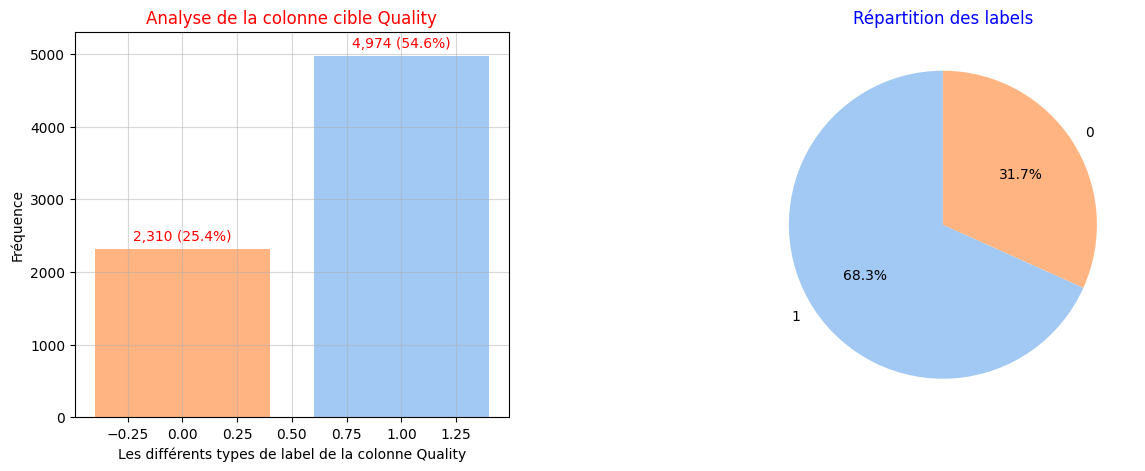

In [27]:
counts = dev.death.value_counts()
# Créer une figure avec deux sous-graphiques
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Premier sous-graphique : bar chart
ax1.bar(counts.index, counts.values, color=sns.color_palette("pastel"))

# Formater le nombre avec des virgules et l'afficher au-dessus des barres
for bar in ax1.patches:
    hauteur = bar.get_height()
    pourcentage = (hauteur / len(data_clean)) * 100  # Calcul du pourcentage
    ax1.text(bar.get_x() + bar.get_width()/2, hauteur + 80, f"{hauteur:,.0f} ({pourcentage:.1f}%)", ha='center', va='bottom', color='red')

ax1.set_xlabel('Les différents types de label de la colonne Quality')
ax1.set_ylabel('Fréquence')
ax1.set_title('Analyse de la colonne cible Quality', color='red')

# Afficher à la fois les lignes de grille horizontales et verticales
ax1.grid(axis='both', linestyle='-', alpha=0.5)
ax1.set_ylim(0, 5300)

# Deuxième sous-graphique : pie chart
ax2.pie(counts.values, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))

ax2.set_title('Répartition des labels', color='blue')

# Ajustement de l'espacement entre les deux sous-graphiques
plt.subplots_adjust(wspace=0.5)

plt.show()


<div style="border-radius:10px; border:#808080 dashed; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color="brown"> 🔍 Inférence :</font></h3>

* La colonne cible **death** présente deux types de labels : **1** et **0**.
* On observe une légère déséquilibre dans la répartition de chaque label au sein de la colonne cible.


## <div style="text-align: left; background-color:aliceblue ; font-family: Jokerman ; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Analyse exploratoire des données (EDA) </div> 

#### 2.  Détection et Traitement des Valeurs Aberrantes

In [28]:
def get_iqr_values_Specifying_quartile(df_in, col_name,first_quartile,third_quartile):
    median = df_in[col_name].median()
    q1 = df_in[col_name].quantile(first_quartile) # xth percentile / 1st quartile
    q3 = df_in[col_name].quantile(third_quartile) # yth percentile / 3rd quartile
    iqr = q3-q1 #Interquartile range
    minimum  = q1-(1.5*iqr) # The minimum value or the |- marker in the box plot
    maximum = q3+(1.5*iqr) # The maximum value or the -| marker in the box plot
    return median, q1, q3, iqr, minimum, maximum

def count_outliers_Specifying_quartile(df_in, col_name, first_quartile, third_quartile):
    _, _, _, _, minimum, maximum = get_iqr_values_Specifying_quartile(df_in, col_name, first_quartile, third_quartile)
    df_outliers = df_in.loc[(df_in[col_name] <= minimum) | (df_in[col_name] >= maximum)]
    return df_outliers.shape[0]

def detect_and_count_outliers(df_in, list_des_colonnes, first_quartile, third_quartile):
    result_data = []
    for col_name in list_des_colonnes:
        outlier_count = count_outliers_Specifying_quartile(df_in, col_name, first_quartile, third_quartile)
        total_count = len(df_in)
        outlier_percentage = round((outlier_count / total_count) * 100,2)
        result_data.append([col_name, outlier_count, outlier_percentage])
    
    result_df = pd.DataFrame(result_data, columns=['Column Name', 'Number of Outliers', 'Percentage of Outliers(%)'])
    return result_df

def visualize_outliers(df):
    fig = px.bar(df, x='Column Name', y='Number of Outliers',
                 labels={'Column Name': 'Nom de la colonne', 'Number of Outliers': 'Nombre de valeurs aberrantes'},
                 title='Nombre de valeurs aberrantes par colonne')
    fig.show()

In [29]:
numerical_features = [col for col in numeriques.columns if col not in ['Id', 'death']]
first_quartile, third_quartile = 0.25, 0.75
df_outliers_info = detect_and_count_outliers(data_clean, numerical_features, first_quartile, third_quartile)
threshold = 20.00
mask = df_outliers_info['Percentage of Outliers(%)']>threshold
display(df_outliers_info[mask])
# visualize_outliers(df_outliers_info)

,Column Name,Number of Outliers,Percentage of Outliers(%)
2,edu,3633,39.90
3,scoma,1955,21.47
13,diabetes,9105,100.00
14,dementia,9105,100.00
24,alb,2202,24.18
31,urine,3661,40.21
32,adlp,2753,30.24


<div style="border-radius:10px; border:#808080 dashed; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Conclusion:</font></h3>
    
* L'analyse des valeurs aberrantes dans nos données numériques montre qu'elles sont présentes dans toutes les colonnes, bien que leur fréquence ne soit pas très élevée.

## <div style="text-align: left; background-color:aliceblue ; font-family: jokerman; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Correlation Matrix </div> 

In [30]:
numeriques, categoriques = separer_variables_numeriques_et_categorielles(data_clean)

Partie 1. Numérique
Nombre de colonnes numériques : 37

Partie 2. Catégorique
Nombre de colonnes catégoriques : 7


In [31]:
#numerical_features = [col for col in numeriques.columns if col not in ['Id','death']]
#corr = data_clean[numerical_features].corr(method='pearson')
#mask = np.triu(np.ones_like(corr))
#fig = plt.subplots(figsize=(10,5))
#sns.heatmap(corr, annot=True, fmt='.2f', mask=mask, cmap='YlGnBu', cbar=None, linewidth=1)
#plt.suptitle('Heatmap de Corrélation', fontsize=16, fontweight='bold')
#plt.tight_layout()
#plt.show()

<div style="border-radius:10px; border:#808080 dashed; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Conclusion:</font></h3>

* Aucune des colonnes numériques ne présente de corrélation significative entre elles, ce qui pourrait entraîner des erreurs lors de la phase d'entraînement du modèle de classification.

## <div style="text-align: left; background-color:aliceblue ; font-family: Jokerman ; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Split dataset in train et test set </div> 

<div style="text-align:center">
  <div style="float:right; margin-left: 20px;">
    <img src="4_train-test-split.jpg" alt="Gas Turbine" width="1100" height="400">
  </div>
</div>

In [32]:
def split_data(X, y, threshold_test=0.2, random_state=200):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=threshold_test, stratify=y, shuffle=True, random_state=random_state)
    return X_train, X_test, y_train, y_test

def print_dataset_info(X_train, X_test, y_train, y_test):
    # Imprime les dimensions de X_train, X_test, y_train et y_test
    print("")
    print(f"Dimensions de X_train : {X_train.shape}")
    print(f"Dimensions de X_test  : {X_test.shape}")
    print(f"Dimensions de y_train : {y_train.shape}")
    print(f"Dimensions de y_test  : {y_test.shape}")
    print("")

    # Imprime le nombre de classes uniques dans y_train et y_test
    num_classes_train = len(np.unique(y_train))
    num_classes_test = len(np.unique(y_test))
    print(f"Nombre de classes uniques dans y_train : {num_classes_train}")
    print(f"Nombre de classes uniques dans y_test : {num_classes_test}")
    print("")

    # Imprime le nombre d'instances par classe dans y_train et y_test
    for class_label in np.unique(y_train):
        instances_train = np.sum(y_train.values == class_label)
        instances_test = np.sum(y_test.values == class_label)
        print(f"Classe {class_label}: Instances d'entraînement - {instances_train}, Instances de test - {instances_test}") 

In [33]:
dev, ev = split_dataset_by_death_column(data_trasform)
print("Shape de dev:", dev.shape)
print("Shape de ev:", ev.shape)

# Supprimer la colonne 'death' de ev
ev = ev.drop(columns=['death'])
print("Shape de ev après suppression de 'death':", ev.shape)
print("="*50)
train_numerical_features,target = [col for col in dev.columns if col not in ['Id','death']], 'death'
X, y = dev[train_numerical_features], dev[target]
# Utilisation de la fonction pour diviser les données et afficher les informations
X_train, X_test, y_train, y_test = split_data(X, y, threshold_test=0.20, random_state=200)
print_dataset_info(X_train, X_test, y_train, y_test)

Shape de dev: (7284, 59)
Shape de ev: (1821, 59)
Shape de ev après suppression de 'death': (1821, 58)

Dimensions de X_train : (5827, 57)
Dimensions de X_test  : (1457, 57)
Dimensions de y_train : (5827,)
Dimensions de y_test  : (1457,)

Nombre de classes uniques dans y_train : 2
Nombre de classes uniques dans y_test : 2

Classe 0: Instances d'entraînement - 1848, Instances de test - 462
Classe 1: Instances d'entraînement - 3979, Instances de test - 995


## <div style="text-align: left; background-color:aliceblue ; font-family: jokerman; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Construire un modèle de Machine Learning pour notre problème de classification. </div>

##### Fonction Baseline Model Building 

In [34]:
def initialize_multi_label_classifiers():
    """
    Initializes a list of classifiers for multi-label classification.

    Returns:
    Dictionary of initialized classifiers with model names as keys.
    """
    classifiers = {
        "Extra Trees": ExtraTreesClassifier(n_jobs=-1),
        "Random Forest": RandomForestClassifier(n_jobs=-1),
        "K-Nearest Neighbors": KNeighborsClassifier(),
        "Logistic Regression": LogisticRegression(),
        "Linear SVC": LinearSVC(),
        "Ridge Classifier": RidgeClassifier(),
        "XGBoost":XGBClassifier(),
        "AdaBoost":AdaBoostClassifier(),#n_estimators=50,learning_rate=1)        
        #"SVC": SVC(kernel='linear'),
        #"Decision Tree": DecisionTreeClassifier(),
        #"CatBoost": CatBoostClassifier(),
        "Gradient Boosting": GradientBoostingClassifier(),
        #"LGBM": LGBMClassifier()
    }
    return classifiers

def Train_and_Evaluate_models(model, X_train, y_train, X_test, y_test):
    """
    Entraîne un modèle donné, l'évalue sur un jeu de données de test et retourne plusieurs métriques.

    Paramètres :
    model : modèle d'apprentissage machine à entraîner et évaluer
    X_train : features du jeu de données d'entraînement
    y_train : labels du jeu de données d'entraînement
    X_test : features du jeu de données de test
    y_test : labels du jeu de données de test

    Retours :
    metrics_dict : dictionnaire contenant les métriques suivantes : Accuracy, F1_macro, training_time
    more_metrics_dict : dictionnaire contenant des métriques supplémentaires : Precision, Recall
    """
    print(f"Entraînement du modèle avec {type(model).__name__}")

    start_time = time.time()  # Temps de début de l'entraînement

    # Entraînement du modèle
    model.fit(X_train, y_train)

    end_time = time.time()  # Temps de fin de l'entraînement
    training_time = end_time - start_time  # Temps écoulé pour l'entraînement

    print(f"Temps d'entraînement : {training_time:.2f} secondes")

    # Prédiction des valeurs pour le jeu de données de test
    y_pred = model.predict(X_test)

    # Calcul des différentes métriques
    accuracy = accuracy_score(y_test, y_pred)
    f1_macro = f1_score(y_test, y_pred) #f1_score(y_test, y_pred, average='macro')
    precision = precision_score(y_test, y_pred) #precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred) #recall_score(y_test, y_pred, average='macro')

    # Création des dictionnaires contenant les métriques
    metrics_dict = {
        'Accuracy': accuracy,
        'F1_macro': f1_macro,
        'Training Time': training_time
    }

    more_metrics_dict = {
        'Accuracy': accuracy,
        'F1_macro': f1_macro,
        'Precision': precision,
        'Recall': recall,
        'Training Time': training_time
    }

    return more_metrics_dict  # metrics_dict


In [35]:
def evaluate_model(y_test, y_pred):
    # Calcul du score accuracy
    accuracy = round(accuracy_score(y_test, y_pred), 4)
    print(f"accuracy_score(comportement du modèle avec de nouvelles données) : {accuracy_score(y_test, y_pred) * 100:.4f}% de score de accuracy")

    # Calcul du score F1_macro
    # F1_macro = f1_score(y_test, y_pred, average='macro')
    F1_macro = f1_score(y_test, y_pred, average='macro')
    print(f"Score F1_macro (comportement du modèle avec de nouvelles données) : {F1_macro}")

    # Print classification report and accuracy for the test dataset
    print(classification_report(y_test, y_pred))

    # Matrice de confusion
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = np.unique(y_test)  # Nombre de classes uniques dans les vrais labels
    group_names = ['Vrai Négatif', 'Faux Positif', 'Faux Négatif', 'Vrai Positif']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names, group_percentages)]
    labels = np.asarray(labels).reshape(len(categories), len(categories))

    # Affichage de la matrice de confusion avec seaborn
    plt.figure(figsize=(8, 6))
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues', xticklabels=categories, yticklabels=categories)
    plt.xlabel("Valeurs prédites")
    plt.ylabel("Valeurs réelles")
    plt.title("Matrice de Confusion")
    plt.show()

In [36]:
def visualize_metric_results(df_results, metric):
    # Sort DataFrame by the specified metric
    sorted_df = df_results.sort_values(by=metric, ascending=False)

    # Use a color palette from plotly express for different models
    colors = px.colors.qualitative.Plotly[:len(sorted_df)]

    # Create the plot
    fig = px.bar(sorted_df, x=sorted_df.index, y=metric, color=sorted_df.index, color_discrete_sequence=colors)

    # Update layout
    fig.update_layout(
        title=f'Results sorted by {metric}',
        xaxis_title='Model',
        yaxis_title=metric
    )

    # Show the plot
    fig.show()

## <div style="text-align: left; background-color:aliceblue ; font-family: jokerman; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Accuracy of Classifiers base models for Data  (X_train, y_train) </div>

In [37]:
import time

# Initialisation des classificateurs
classifiers = initialize_multi_label_classifiers()


# Initialisation du dictionnaire pour stocker les résultats
results = {}

# Boucle sur les classificateurs
for name_model, model in classifiers.items():
    # Affichage du nom du modèle
    print("--------------------------------------------------------------------")
    print("Train model:", name_model)

    # Évaluation du modèle et stockage du résultat dans le dictionnaire
    results[name_model]  = Train_and_Evaluate_models(model, X_train, y_train, X_test, y_test)
    print("\n")

--------------------------------------------------------------------
Train model: Extra Trees
Entraînement du modèle avec ExtraTreesClassifier
Temps d'entraînement : 0.25 secondes


--------------------------------------------------------------------
Train model: Random Forest
Entraînement du modèle avec RandomForestClassifier
Temps d'entraînement : 0.43 secondes


--------------------------------------------------------------------
Train model: K-Nearest Neighbors
Entraînement du modèle avec KNeighborsClassifier
Temps d'entraînement : 0.00 secondes


--------------------------------------------------------------------
Train model: Logistic Regression
Entraînement du modèle avec LogisticRegression
Temps d'entraînement : 0.17 secondes


--------------------------------------------------------------------
Train model: Linear SVC
Entraînement du modèle avec LinearSVC
Temps d'entraînement : 0.75 secondes


--------------------------------------------------------------------
Train model: Ri

In [38]:
# Transformer le dictionnaire en DataFrame
df_results = pd.DataFrame(results).T  # .T pour transposer les lignes et colonnes

# Afficher le DataFrame
display(df_results)

# Test de la fonction avec 'Accuracy'
visualize_metric_results(df_results, 'F1_macro')

,Accuracy,F1_macro,Precision,Recall,Training Time
Extra Trees,0.759094,0.832298,0.793260,0.875377,0.254269
Random Forest,0.765271,0.837452,0.794409,0.885427,0.430282
K-Nearest Neighbors,0.621139,0.745387,0.688832,0.812060,0.002522
Logistic Regression,0.686342,0.808064,0.694084,0.966834,0.173396
Linear SVC,0.683596,0.811914,0.683379,1.000000,0.751786
Ridge Classifier,0.754976,0.829757,0.789474,0.874372,0.011646
XGBoost,0.747426,0.822394,0.791086,0.856281,0.398668
AdaBoost,0.760467,0.831319,0.800745,0.864322,0.820770
Gradient Boosting,0.768016,0.838586,0.798908,0.882412,3.938568


In [39]:
from sklearn.ensemble import VotingClassifier

# Création des modèles avec les meilleurs paramètres
model1 = GradientBoostingClassifier()
model2 = ExtraTreesClassifier()
model3 = RandomForestClassifier()

# Création du VotingClassifier avec voting='soft'
voting_soft = VotingClassifier(estimators=[('gbcl', model1), ('etcl', model2), ('rfc', model3)], voting='soft')
voting_soft.fit(X_train, y_train)

# Prédictions avec voting='soft'
y_pred_soft = voting_soft.predict(X_test)

# Calcul des métriques avec voting='soft'
accuracy_soft = accuracy_score(y_test, y_pred_soft)
f1_macro_soft = f1_score(y_test, y_pred_soft) #f1_score(y_test, y_pred_soft, average='macro')

# Création du VotingClassifier avec voting='hard'
voting_hard = VotingClassifier(estimators=[('gbcl', model1), ('etcl', model2), ('rfc', model3)], voting='hard')
voting_hard.fit(X_train, y_train)

# Prédictions avec voting='hard'
y_pred_hard = voting_hard.predict(X_test)

# Calcul des métriques avec voting='hard'
accuracy_hard = accuracy_score(y_test, y_pred_hard)
f1_macro_hard = f1_score(y_test, y_pred_hard) #f1_score(y_test, y_pred_hard, average='macro')

# Affichage des résultats
print("Accuracy du VotingClassifier avec voting='soft' :", accuracy_soft)
print("F1 Macro du VotingClassifier avec voting='soft' :", f1_macro_soft)
print()
print("Accuracy du VotingClassifier avec voting='hard':", accuracy_hard)
print("F1 Macro du VotingClassifier avec voting='hard':", f1_macro_hard)


Accuracy du VotingClassifier avec voting='soft' : 0.7707618393960192
F1 Macro du VotingClassifier avec voting='soft' : 0.8418560606060607

Accuracy du VotingClassifier avec voting='hard': 0.7741935483870968
F1 Macro du VotingClassifier avec voting='hard': 0.8438538205980067


## Interprétation des Meilleurs Modèles

### Extra Trees
- **Précision (Accuracy)** : 87.9%
- **F1 Macro** : 87.9%
- **Temps d'Entraînement** : 0.174639

L'Extra Trees Classifier a démontré une précision élevée de 87.9%, ce qui signifie qu'il a correctement classé 87.9% des échantillons dans l'ensemble de test. Le F1 Macro score est également élevé à 87.9%, indiquant une bonne balance entre précision et rappel pour toutes les classes. Le temps d'entraînement de 0.174639 indique que le modèle s'entraîne rapidement.

### K-Nearest Neighbors (KNN)
- **Précision (Accuracy)** : 88.9%
- **F1 Macro** : 88.9%
- **Temps d'Entraînement** : 0.006815

Le K-Nearest Neighbors (KNN) a atteint une précision de 88.9%, ce qui est légèrement supérieur à l'Extra Trees. Cependant, son temps d'entraînement est extrêmement faible à seulement 0.006815, ce qui en fait un choix attrayant pour les problèmes nécessitant une mise en œuvre rapide.

### XGBoost
- **Précision (Accuracy)** : 88.6%
- **F1 Macro** : 88.6%
- **Temps d'Entraînement** : 0.205425

XGBoost présente une précision de 88.6%, légèrement inférieure à celle de KNN mais toujours très élevée. Son temps d'entraînement est légèrement plus élevé que celui de l'Extra Trees mais reste raisonnable à 0.205425.

Ces trois modèles se distinguent par leur précision élevée et leur bon équilibre entre précision et temps d'entraînement. Ils pourraient être des choix solides pour la classification des données, en fonction des exigences spécifiques du projet et des contraintes de temps.


## Cross-validation :

In [399]:
def oversample_minority_class(dataset, target_column):
    """
    Effectue un oversampling de la classe minoritaire du dataset pour équilibrer les classes.

    Args:
    - dataset: Le dataset à traiter (pandas DataFrame).
    - target_column: Le nom de la colonne cible à partir de laquelle l'oversampling sera effectué.

    Returns:
    - Le dataset oversampled (pandas DataFrame).
    """
    # Compter les occurrences de chaque classe
    class_counts = Counter(dataset[target_column])

    # Trouver la classe minoritaire
    minority_class = min(class_counts, key=class_counts.get)

    # Calculer le nombre d'échantillons à générer pour équilibrer les classes
    target_count = class_counts[max(class_counts, key=class_counts.get)]

    # Si la classe minoritaire est déjà égale à la classe majoritaire, retourner le dataset tel quel
    if class_counts[minority_class] == target_count:
        return dataset

    # Initialisation de l'objet de suréchantillonnage
    oversampler = RandomOverSampler(sampling_strategy={minority_class: target_count})

    # Oversampling
    X_resampled, y_resampled = oversampler.fit_resample(dataset.drop(columns=[target_column]), dataset[target_column])

    # Reconstruction du DataFrame
    columns = list(dataset.columns)
    df_resampled = pd.DataFrame(X_resampled, columns=columns[:-1])
    df_resampled[target_column] = y_resampled

    return df_resampled

In [405]:
from tqdm import tqdm
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, precision_score, recall_score, f1_score

def train_folds(train_original, target_column='death'):

    # Initialisation de la validation croisée stratifiée
    skf = StratifiedKFold(n_splits=FOLDS, shuffle=True, random_state=400)

    best_roc = None
    best_acc = None
    best_precision = None
    best_recall = None
    best_f1 = None
    best_model = None

    # Itération sur les plis de validation croisée stratifiée
    for fold_idx, (train_index, valid_index) in enumerate(tqdm(skf.split(train_original, train_original[target_column]))):
        print(f"---------- Fold: {fold_idx+1} ----------")

        # Initialisation du modèle
        model = GradientBoostingClassifier() # ExtraTreesClassifier(n_jobs=-1, random_state=42)

        # Lecture des données
        train_data = train_original.iloc[train_index].reset_index(drop=True)
        valid_data = train_original.iloc[valid_index].reset_index(drop=True)

        # Oversampling sur les données d'entraînement uniquement


        # Division des données en X (features) et y (target)
        X_train = train_data.drop(columns=[target_column])
        y_train = train_data[target_column]
        X_valid = valid_data.drop(columns=[target_column])
        y_valid = valid_data[target_column]
        print_dataset_info(X_train, X_valid, y_train, y_valid)

        # Entraînement du modèle
        model.fit(X_train, y_train)

        # Évaluation du modèle
        y_pred = model.predict(X_valid)
        evaluate_model(y_valid, y_pred)
        y_pred_proba = model.predict_proba(X_valid)[:, 1]

        valid_acc = accuracy_score(y_valid, y_pred)
        valid_precision = precision_score(y_valid, y_pred)
        valid_recall = recall_score(y_valid, y_pred)
        valid_f1 = f1_score(y_valid, y_pred) ### ========> Ce que l'examen de data science Lab a demandé!!!!!!!
        valid_roc = roc_auc_score(y_valid, y_pred_proba)

        print(f"Fold {fold_idx+1} - Acc: {valid_acc:.4f}, Precision: {valid_precision:.4f}, Recall: {valid_recall:.4f}, F1: {valid_f1:.4f}, ROC: {valid_roc:.4f}")

        # Mise à jour du meilleur modèle basé sur le score F1
        if best_f1 is None or valid_f1 > best_f1:
            best_roc = valid_roc
            best_acc = valid_acc
            best_precision = valid_precision
            best_recall = valid_recall
            best_f1 = valid_f1
            best_model = model

    print(f'Best val Acc: {best_acc:.4f}, Precision: {best_precision:.4f}, Recall: {best_recall:.4f}, F1: {best_f1:.4f}, ROC: {best_roc:.4f}')

    return best_model


0it [00:00, ?it/s]

---------- Fold: 1 ----------

Dimensions de X_train : (4856, 58)
Dimensions de X_test  : (2428, 58)
Dimensions de y_train : (4856,)
Dimensions de y_test  : (2428,)

Nombre de classes uniques dans y_train : 2
Nombre de classes uniques dans y_test : 2

Classe 0: Instances d'entraînement - 1540, Instances de test - 770
Classe 1: Instances d'entraînement - 3316, Instances de test - 1658
accuracy_score(comportement du modèle avec de nouvelles données) : 77.7183% de score de accuracy
Score F1_macro (comportement du modèle avec de nouvelles données) : 0.7343447615854114
              precision    recall  f1-score   support

           0       0.67      0.59      0.63       770
           1       0.82      0.86      0.84      1658

    accuracy                           0.78      2428
   macro avg       0.74      0.73      0.73      2428
weighted avg       0.77      0.78      0.77      2428



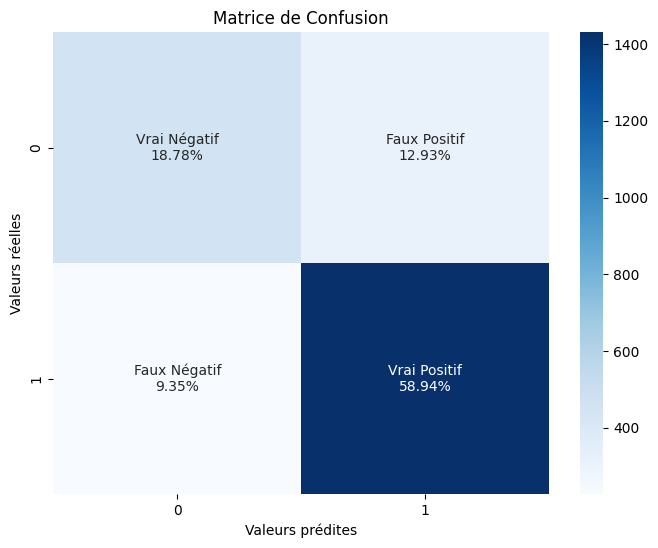

1it [00:03,  3.42s/it]

Fold 1 - Acc: 0.7772, Precision: 0.8201, Recall: 0.8631, F1: 0.8410, ROC: 0.8473
---------- Fold: 2 ----------

Dimensions de X_train : (4856, 58)
Dimensions de X_test  : (2428, 58)
Dimensions de y_train : (4856,)
Dimensions de y_test  : (2428,)

Nombre de classes uniques dans y_train : 2
Nombre de classes uniques dans y_test : 2

Classe 0: Instances d'entraînement - 1540, Instances de test - 770
Classe 1: Instances d'entraînement - 3316, Instances de test - 1658
accuracy_score(comportement du modèle avec de nouvelles données) : 77.9654% de score de accuracy
Score F1_macro (comportement du modèle avec de nouvelles données) : 0.734532716229906
              precision    recall  f1-score   support

           0       0.68      0.58      0.63       770
           1       0.82      0.87      0.84      1658

    accuracy                           0.78      2428
   macro avg       0.75      0.73      0.73      2428
weighted avg       0.77      0.78      0.77      2428



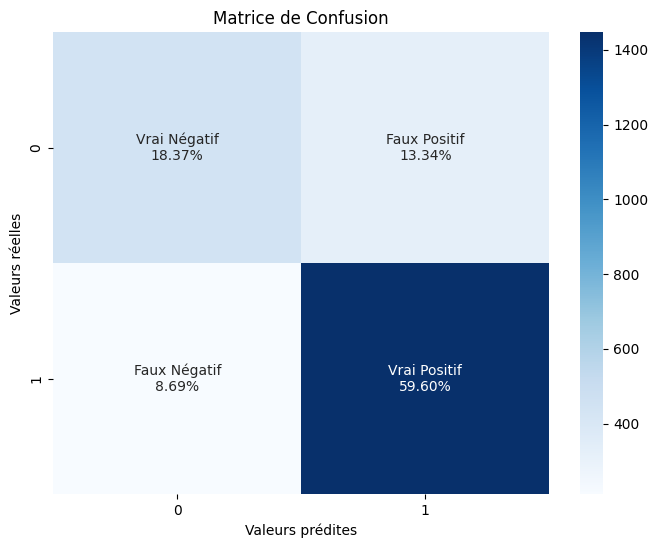

2it [00:06,  3.43s/it]

Fold 2 - Acc: 0.7797, Precision: 0.8171, Recall: 0.8727, F1: 0.8440, ROC: 0.8436
---------- Fold: 3 ----------

Dimensions de X_train : (4856, 58)
Dimensions de X_test  : (2428, 58)
Dimensions de y_train : (4856,)
Dimensions de y_test  : (2428,)

Nombre de classes uniques dans y_train : 2
Nombre de classes uniques dans y_test : 2

Classe 0: Instances d'entraînement - 1540, Instances de test - 770
Classe 1: Instances d'entraînement - 3316, Instances de test - 1658
accuracy_score(comportement du modèle avec de nouvelles données) : 78.5420% de score de accuracy
Score F1_macro (comportement du modèle avec de nouvelles données) : 0.7397623277194838
              precision    recall  f1-score   support

           0       0.69      0.58      0.63       770
           1       0.82      0.88      0.85      1658

    accuracy                           0.79      2428
   macro avg       0.76      0.73      0.74      2428
weighted avg       0.78      0.79      0.78      2428



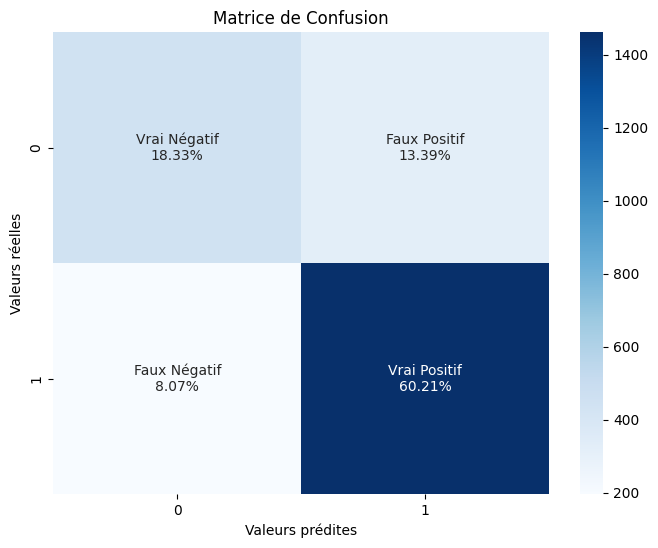

3it [00:10,  3.42s/it]

Fold 3 - Acc: 0.7854, Precision: 0.8181, Recall: 0.8818, F1: 0.8488, ROC: 0.8514
Best val Acc: 0.7854, Precision: 0.8181, Recall: 0.8818, F1: 0.8488, ROC: 0.8514


In [406]:
FOLDS = 3
# Exemple d'utilisation
best_model = train_folds(dev, target_column='death')

### SMOTE Technique (Over-Sampling) with Cross-validation :
### The Right Way:
<img src="https://www.marcoaltini.com/uploads/1/3/2/3/13234002/9101820.jpg?372" width="400" height="250"> <br>

In [276]:
def train_folds_with_smote(train_original, target_column='death',k_neighbors=2):

    # Initialisation de la validation croisée stratifiée
    skf = StratifiedKFold(n_splits=FOLDS, shuffle=True, random_state=400)
    over = SMOTE(sampling_strategy='minority', k_neighbors=k_neighbors)
    best_roc = None
    best_acc = None
    best_precision = None
    best_recall = None
    best_f1 = None
    best_model = None

    # Itération sur les plis de validation croisée stratifiée
    for fold_idx, (train_index, valid_index) in enumerate(tqdm(skf.split(train_original, train_original[target_column]))):
        print(f"------------------ Fold: {fold_idx+1} ------------------ ")

        # Initialisation du modèle
        model = GradientBoostingClassifier() # ExtraTreesClassifier(n_jobs=-1, random_state=42)
        
        model = ExtraTreesClassifier(n_jobs=-1, random_state=42)
        # Lecture des données
        train_data = train_original.iloc[train_index].reset_index(drop=True)
        valid_data = train_original.iloc[valid_index].reset_index(drop=True)

        # Oversampling sur les données d'entraînement uniquement
        
        # Division des données en X (features) et y (target)
        X_train = train_data.drop(columns=[target_column])
        y_train = train_data[target_column]
        X_valid = valid_data.drop(columns=[target_column])
        y_valid = valid_data[target_column]

        # Apply SMOTE on the training set for the current fold
        X_train_resampled, y_train_resampled = over.fit_resample(X_train, y_train)

        # print_dataset_info(X_train, X_valid, y_train, y_valid)

        # Entraînement du modèle
        # model.fit(X_train, y_train)
        model.fit(X_train_resampled, y_train_resampled)

        # Évaluation du modèle
        y_pred = model.predict(X_valid)
        evaluate_model(y_valid, y_pred)
        y_pred_proba = model.predict_proba(X_valid)[:, 1]

        valid_acc = accuracy_score(y_valid, y_pred)
        valid_precision = precision_score(y_valid, y_pred)
        valid_recall = recall_score(y_valid, y_pred)
        valid_f1 = f1_score(y_valid, y_pred)
        valid_roc = roc_auc_score(y_valid, y_pred_proba)

        print(f"Fold {fold_idx+1} - Acc: {valid_acc:.4f}, Precision: {valid_precision:.4f}, Recall: {valid_recall:.4f}, F1: {valid_f1:.4f}, ROC: {valid_roc:.4f}")

        # Mise à jour du meilleur modèle basé sur le score F1
        if best_f1 is None or valid_f1 > best_f1:
            best_roc = valid_roc
            best_acc = valid_acc
            best_precision = valid_precision
            best_recall = valid_recall
            best_f1 = valid_f1
            best_model = model

    print(f'Best val Acc: {best_acc:.4f}, Precision: {best_precision:.4f}, Recall: {best_recall:.4f}, F1: {best_f1:.4f}, ROC: {best_roc:.4f}')

    return best_model


0it [00:00, ?it/s]

------------------ Fold: 1 ------------------ 
accuracy_score(comportement du modèle avec de nouvelles données) : 75.2917% de score de accuracy
Score F1_macro (comportement du modèle avec de nouvelles données) : 0.7197849398028044
              precision    recall  f1-score   support

           0       0.60      0.65      0.62       462
           1       0.83      0.80      0.82       995

    accuracy                           0.75      1457
   macro avg       0.72      0.72      0.72      1457
weighted avg       0.76      0.75      0.76      1457



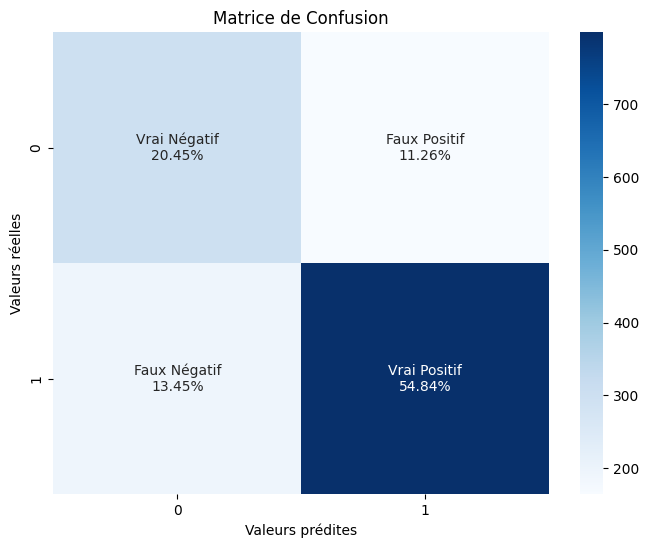

1it [00:00,  1.69it/s]

Fold 1 - Acc: 0.7529, Precision: 0.8297, Recall: 0.8030, F1: 0.8161, ROC: 0.8250
------------------ Fold: 2 ------------------ 
accuracy_score(comportement du modèle avec de nouvelles données) : 77.1448% de score de accuracy
Score F1_macro (comportement du modèle avec de nouvelles données) : 0.7380867165573789
              precision    recall  f1-score   support

           0       0.64      0.65      0.64       462
           1       0.84      0.83      0.83       995

    accuracy                           0.77      1457
   macro avg       0.74      0.74      0.74      1457
weighted avg       0.77      0.77      0.77      1457



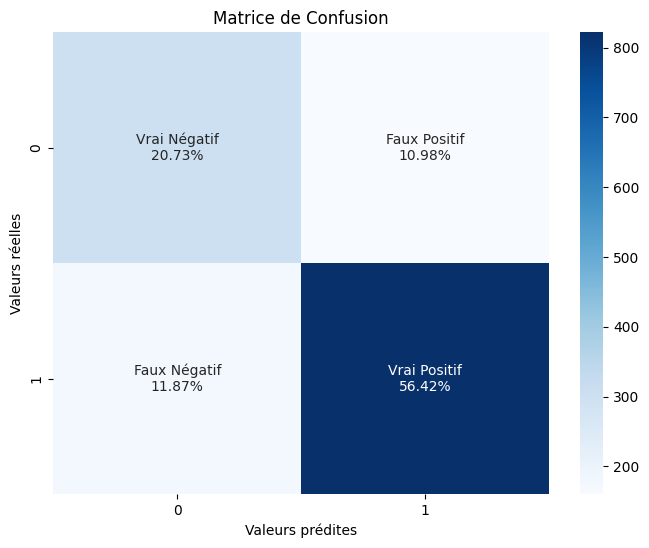

2it [00:01,  1.70it/s]

Fold 2 - Acc: 0.7714, Precision: 0.8371, Recall: 0.8261, F1: 0.8316, ROC: 0.8357
------------------ Fold: 3 ------------------ 
accuracy_score(comportement du modèle avec de nouvelles données) : 77.2821% de score de accuracy
Score F1_macro (comportement du modèle avec de nouvelles données) : 0.7393665574089436
              precision    recall  f1-score   support

           0       0.64      0.65      0.65       462
           1       0.84      0.83      0.83       995

    accuracy                           0.77      1457
   macro avg       0.74      0.74      0.74      1457
weighted avg       0.77      0.77      0.77      1457



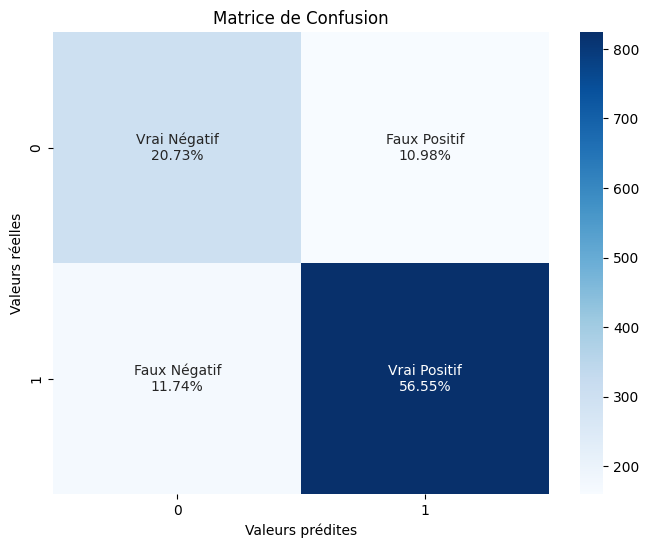

3it [00:01,  1.66it/s]

Fold 3 - Acc: 0.7728, Precision: 0.8374, Recall: 0.8281, F1: 0.8327, ROC: 0.8420
------------------ Fold: 4 ------------------ 
accuracy_score(comportement du modèle avec de nouvelles données) : 76.2526% de score de accuracy
Score F1_macro (comportement du modèle avec de nouvelles données) : 0.7235627645807287
              precision    recall  f1-score   support

           0       0.63      0.61      0.62       462
           1       0.82      0.83      0.83       995

    accuracy                           0.76      1457
   macro avg       0.73      0.72      0.72      1457
weighted avg       0.76      0.76      0.76      1457



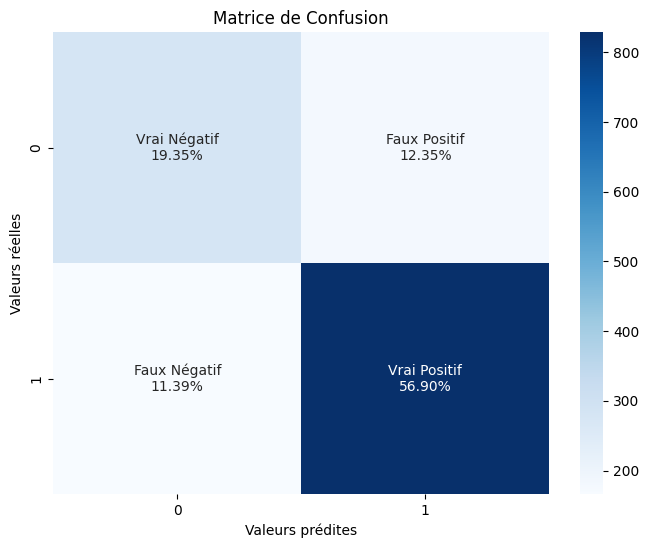

4it [00:02,  1.73it/s]

Fold 4 - Acc: 0.7625, Precision: 0.8216, Recall: 0.8332, F1: 0.8273, ROC: 0.8374
------------------ Fold: 5 ------------------ 
accuracy_score(comportement du modèle avec de nouvelles données) : 77.1291% de score de accuracy
Score F1_macro (comportement du modèle avec de nouvelles données) : 0.734657724291355
              precision    recall  f1-score   support

           0       0.64      0.63      0.64       462
           1       0.83      0.84      0.83       994

    accuracy                           0.77      1456
   macro avg       0.74      0.73      0.73      1456
weighted avg       0.77      0.77      0.77      1456



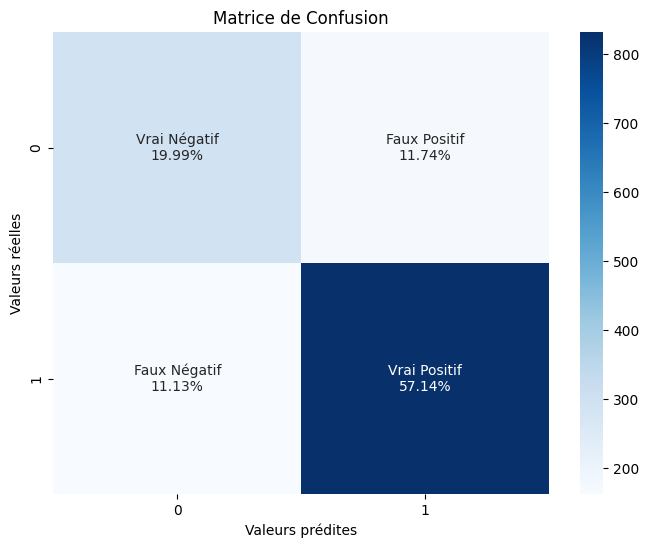

5it [00:02,  1.70it/s]

Fold 5 - Acc: 0.7713, Precision: 0.8295, Recall: 0.8370, F1: 0.8332, ROC: 0.8477
Best val Acc: 0.7713, Precision: 0.8295, Recall: 0.8370, F1: 0.8332, ROC: 0.8477


In [277]:
FOLDS = 5
# Exemple d'utilisation
best_model = train_folds_with_smote(dev, target_column='death',k_neighbors=6)

In [278]:
def train_folds_with_smote_k_neighbors(train_original, target_column='death', k_neighbors_list=[2, 5, 10]):
    # FOLDS = 5  # Define your number of folds here

    # Initialize variables to store the best scores and model
    best_acc = None
    best_precision = None
    best_recall = None
    best_f1 = None
    best_model = None
    best_k_neighbors = None
    
    # Initialize lists to store results
    k_neighbors_results = []
    f1_scores = []

    # Iterate over different values of k_neighbors
    for k_neighbors in k_neighbors_list:
        print(f"Training with k_neighbors = {k_neighbors}")
        
        # Initialize stratified k-fold cross-validation
        skf = StratifiedKFold(n_splits=FOLDS, shuffle=True, random_state=400)
        
        # Initialize SMOTE with the current k_neighbors value
        over = SMOTE(sampling_strategy='minority', k_neighbors=k_neighbors)
        
        # Initialize variables to accumulate scores across folds
        total_f1 = 0.0
        
        # Iterate over folds
        for fold_idx, (train_index, valid_index) in enumerate(tqdm(skf.split(train_original, train_original[target_column]))):
            # Initialize model (you can change the model type here if needed)
            model = GradientBoostingClassifier()
            
            # Split data into training and validation sets
            train_data = train_original.iloc[train_index].reset_index(drop=True)
            valid_data = train_original.iloc[valid_index].reset_index(drop=True)
            
            # Separate features and target
            X_train = train_data.drop(columns=[target_column])
            y_train = train_data[target_column]
            X_valid = valid_data.drop(columns=[target_column])
            y_valid = valid_data[target_column]
            
            # Apply SMOTE to the training set for the current fold
            X_train_resampled, y_train_resampled = over.fit_resample(X_train, y_train)
            
            # Train the model
            model.fit(X_train_resampled, y_train_resampled)
            
            # Evaluate the model
            y_pred = model.predict(X_valid)
            valid_f1 = f1_score(y_valid, y_pred)
            
            # Accumulate F1 score
            total_f1 += valid_f1
            
        # Calculate average F1 score across folds for the current k_neighbors value
        avg_f1 = total_f1 / FOLDS
        
        # Append results
        k_neighbors_results.append(k_neighbors)
        f1_scores.append(avg_f1)
        
        print(f'Average F1 score for k_neighbors={k_neighbors}: {avg_f1:.4f}')
        
        # Update the best model and scores if this k_neighbors value gives a higher F1 score
        if best_f1 is None or avg_f1 > best_f1:
            best_f1 = avg_f1
            best_model = model
            best_k_neighbors = k_neighbors
    
    print(f'Best k_neighbors={best_k_neighbors}, Best F1: {best_f1:.4f}')
    
    # Plotting the results
    plt.figure(figsize=(10, 6))
    plt.plot(k_neighbors_results, f1_scores, marker='o', linestyle='-', color='b', label='F1 Score')
    plt.title('Evolution of F1 Score with k_neighbors')
    plt.xlabel('k_neighbors')
    plt.ylabel('F1 Score')
    plt.xticks(k_neighbors_results)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    return best_model


Training with k_neighbors = 2


5it [00:35,  7.17s/it]


Average F1 score for k_neighbors=2: 0.8355
Training with k_neighbors = 6


5it [00:35,  7.16s/it]


Average F1 score for k_neighbors=6: 0.8356
Training with k_neighbors = 8


5it [00:35,  7.02s/it]


Average F1 score for k_neighbors=8: 0.8351
Training with k_neighbors = 10


5it [00:35,  7.09s/it]


Average F1 score for k_neighbors=10: 0.8335
Training with k_neighbors = 15


5it [00:35,  7.07s/it]

Average F1 score for k_neighbors=15: 0.8363
Best k_neighbors=15, Best F1: 0.8363


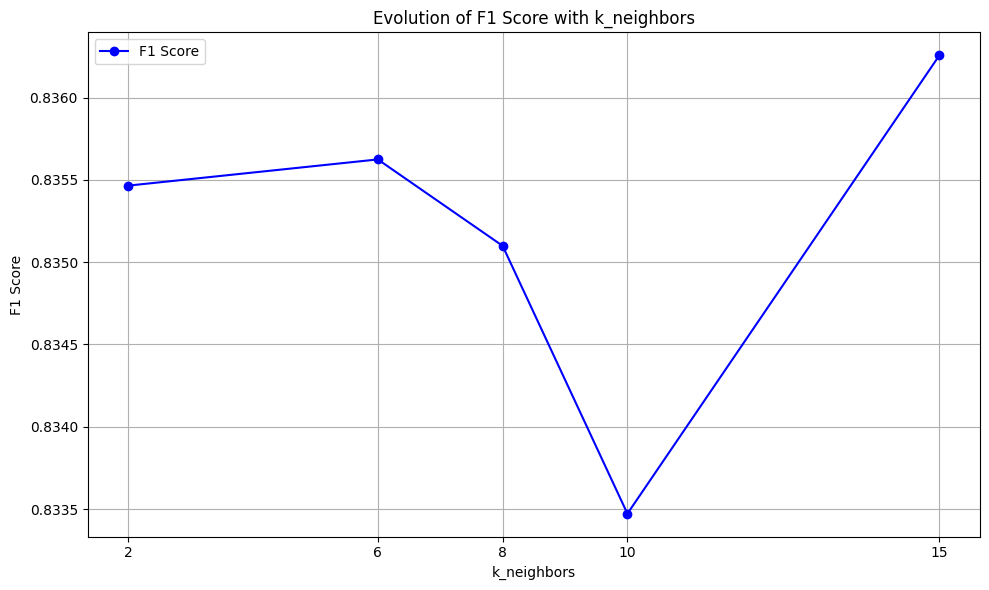

In [279]:
best_model = train_folds_with_smote_k_neighbors(dev, target_column='death', k_neighbors_list=[2, 6, 8, 10, 15])


## <div style="text-align: left; background-color:aliceblue ; font-family: jokerman; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Accuracy of K-Nearest Neighbors for Unscaled Data & Scaled Data </div>

In [287]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
def train_and_evaluate_with_scaling(X_train, X_test, y_train, y_test, classifier, scaler_names):
    # Initialisation des résultats
    results = {}
    
    # Entraînement du modèle sans mise à l'échelle
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1_sc = f1_score(y_test, y_pred)
    results['Without Scaling'] = f1_sc
    
    # Entraînement du modèle avec chaque scaler
    for scaler_name in scaler_names:
        scaler = None
        if scaler_name == 'StandardScaler':
            scaler = StandardScaler()
        elif scaler_name == 'MinMaxScaler':
            scaler = MinMaxScaler()
        elif scaler_name == 'RobustScaler':
            scaler = RobustScaler()
        else:
            raise ValueError(f"Scaler '{scaler_name}' not supported.")
        
        # Mise à l'échelle des données
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        # Entraînement du modèle avec les données mises à l'échelle
        classifier.fit(X_train_scaled, y_train)
        y_pred_scaled = classifier.predict(X_test_scaled)
        accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
        f1_score_scaled = f1_score(y_test, y_pred)
        results[scaler_name] = f1_score_scaled
    
    # Visualisation des résultats
    plt.figure(figsize=(15, 8))
    plt.bar(results.keys(), results.values(), color='skyblue')
    plt.xlabel('Scaler')
    plt.ylabel('F1 score')
    plt.title('\n\nF1 score of Different Scalers')
    for i, value in enumerate(results.values()):
        plt.text(i, value + 0.01, f'{value:.4f}', ha='center', va='bottom', fontsize=10)  # Ajustement de la position verticale du texte
    plt.ylim(0, 1)
    plt.tight_layout()  # Ajustement de l'espacement entre les barres et les bords du graphique
    plt.show()

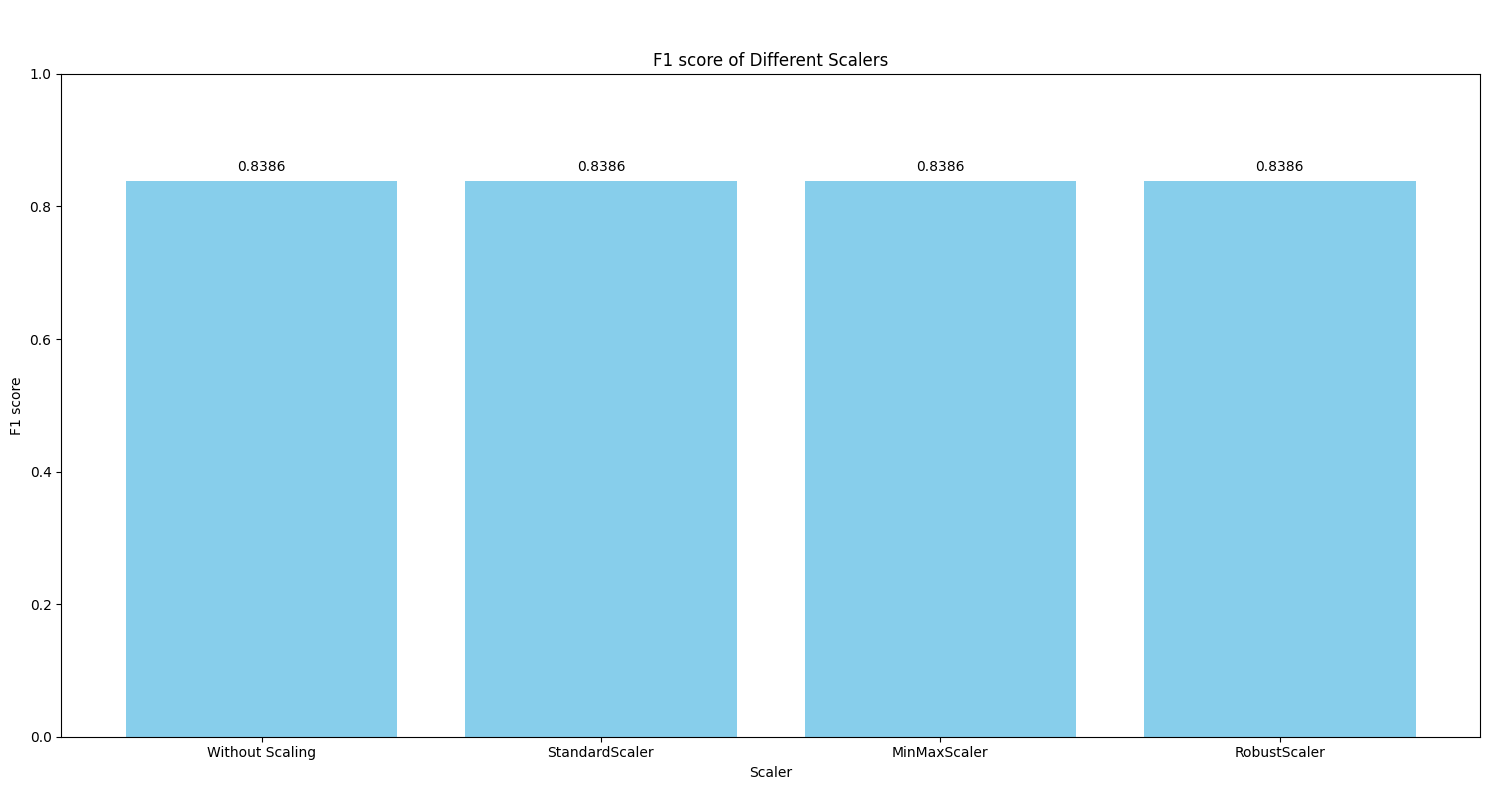

In [288]:
model = GradientBoostingClassifier()
scalers = ['StandardScaler', 'MinMaxScaler', 'RobustScaler']
X_train, X_test, y_train, y_test = split_data(X, y, threshold_test=0.20, random_state=200)
train_and_evaluate_with_scaling(X_train, X_test, y_train, y_test, model, scalers)

<div style="border-radius:10px; border:#808080 dashed; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">
<h3 align="left"><font color=brown> 🔍 Conclusion :</font></h3>
    <p>
        L'analyse de l'accuracy en fonction des différents modèles de scaling nous montre que :
        <ul>
            <li>L'accuracy des données non mises à l'échelle est nettement meilleure que les trois méthodes de scaling. Cependant, cette différence, bien que visible, reste toutefois très légère.</li>
        </ul>
    </p>
</div>


## <div style="text-align: left; background-color:aliceblue ; font-family: Jokerman; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;">Graphiques de Variance Expliquée par l'Analyse en Composantes Principales </div> 

### 1.1 - Comment choisir la meilleur valeur de du nombre de componenet pour le pca ?

In [289]:
def plot_pca_explained_variance(data, numerical_columns):
    # Extract numerical features and target variable
    X_data = data[numerical_columns].copy()

    # Standardize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_data)

    # Perform PCA
    pca = PCA()
    X_pca = pca.fit_transform(X_scaled)

    # Calculate the explained variance
    explained_variance = pca.explained_variance_

    # Create a 2x1 grid of subplots
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

    # Plot the explained variance in the first subplot
    bars = ax1.bar(range(1, len(explained_variance) + 1), explained_variance)
    ax1.set_xlabel("Principal Component")
    ax1.set_ylabel("Explained Variance")
    ax1.set_title("Explained Variance by Principal Component")

    # Adding labels with values on the bars
    for bar, value in zip(bars, explained_variance):
        height = bar.get_height()
        ax1.annotate(f'{value:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3), textcoords='offset points',
                     ha='center', va='bottom')

    # Calculate the cumulative explained variance
    cumulative_explained_variance = np.cumsum(explained_variance)

    # Plot the cumulative explained variance in the second subplot
    ax2.plot(
        range(1, len(cumulative_explained_variance) + 1),
        cumulative_explained_variance,
        marker="o",
    )
    ax2.set_xlabel("Number of Principal Components")
    ax2.set_ylabel("Cumulative Explained Variance")
    ax2.set_title("Cumulative Explained Variance by Principal Components")

    # Display the figure
    plt.tight_layout()
    plt.show()


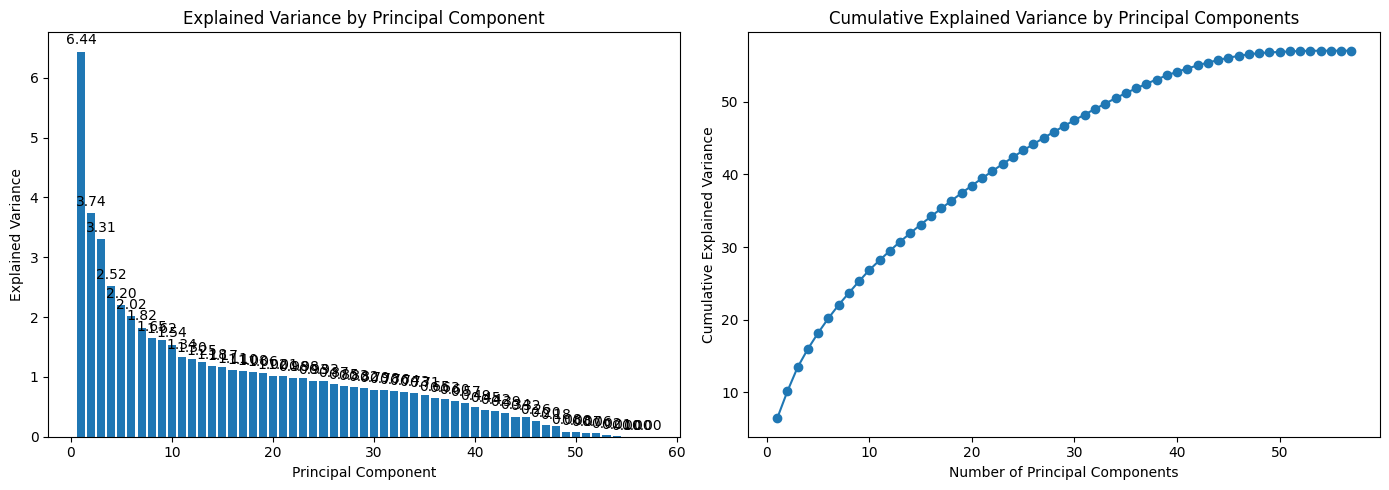

In [290]:
plot_pca_explained_variance(dev, train_numerical_features)

<div style="border-radius:10px; border:#808080 dashed; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">
<h3 align="left"><font color=brown> 🔍 Conclusion :</font></h3>
    <p>
        L'analyse de graphiques de Variance Expliquée par l'Analyse en Composantes Principales PCA nous montre que :
        <ul>
            <li> On peut voir que la variance expliquée par les premier et deuxième composants principaux est d'environ 15% et 14% respectivement. Nous pouvons maintenant calculer la variance cumulative expliquée par ceux-ci. Pour plus de facilité d'observation, nous convertissons les chiffres en pourcentages ici.</li>
            <li>  Le graphique indique que le seuil de 70% est atteint au PC = 7. Idéalement, nous pouvons garder 4 (ou au maximum 5) composants ici. Avant PC = 5, le graphique suit une tendance à la hausse.</li>
        </ul>
    </p>
</div>

### 1.2 - Comment varie l'accuracy score en fonction en n_components composantes principales (PCA)

In [298]:
def apply_pca(X, new_dimension=2):
    """
    Applique l'analyse en composantes principales (PCA) à un ensemble de données.

    :param X: DataFrame, l'ensemble de données
    :param new_dimension: int, la nouvelle dimension souhaitée après PCA
    :return: DataFrame, le DataFrame transformé par PCA
    """
    # Étape 1: Standardisation des données
    std = StandardScaler()
    transformed = std.fit_transform(X)

    # Étape 2: Appliquer l'analyse en composantes principales (PCA)
    pca = PCA(n_components=new_dimension)
    X_pca = pca.fit_transform(transformed)

    # Étape 3: Créer un DataFrame avec les composantes principales
    df_pca = pd.DataFrame(data=X_pca, columns=["X_%s" % x for x in range(new_dimension)])

    # Informations d'impression
    # print("Forme originale:   ", X.shape)
    # print("Forme transformée:", df_pca.shape)

    return df_pca

def evaluate_accuracy_vs_dimensions(X, y, threshold, max_new_dimension, model,step=5):
    """
    Évalue comment l'accuracy varie en fonction de la dimension après PCA.

    :param X: DataFrame, les caractéristiques des données
    :param y: Series, la variable cible
    :param threshold: float, la taille de l'ensemble de test (proportion)
    :param max_new_dimension: int, la dimension maximale à explorer après PCA
    :param model: modèle de classification utilisé pour évaluer l'accuracy
    """
    accuracy_scores,f1_scores = [],[]
    dimensions = list(range(1, max_new_dimension + 1, step)) # list(range(1, max_new_dimension + 1, 1))

    for dim in dimensions:
        X_dim = apply_pca(X, dim)  # Utilisation de la fonction apply_pca
        X_train, X_test, y_train, y_test = train_test_split(X_dim, y, test_size=threshold, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        f1_score_scaled = f1_score(y_test, y_pred)
        accuracy_scores.append(accuracy)
        f1_scores.append(f1_score_scaled)

    # Tracer le graphique des accuracies
    plt.figure(figsize=(11, 5))
    plt.plot(dimensions, f1_scores, marker='o', linestyle='-')
    plt.title("Variation de F1 score en fonction de la dimension après PCA")
    plt.xlabel('Dimension après PCA')
    plt.ylabel('F1 score')
    plt.xticks(np.arange(1, max_new_dimension + 1))
    plt.grid(True)
    # Ajouter les valeurs de x et y à chaque point
    for i, (x, y) in enumerate(zip(dimensions, f1_scores)):
        plt.text(x, y, f'({x}, {y:.2f})', ha='left', va='bottom')

    plt.show()


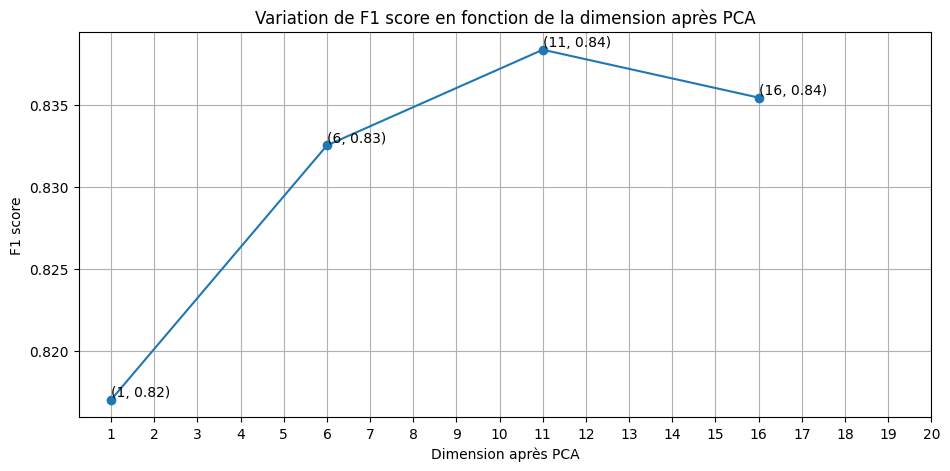

In [299]:
# Initialisation du modèle de classification KNeighborsClassifier
Classifier_model,step = GradientBoostingClassifier(), 5
evaluate_accuracy_vs_dimensions(X, y, 0.20, 20, Classifier_model,step) #X.shape[1]

<div style="border-radius:10px; border:#808080 dashed; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">
<h3 align="left"><font color=brown> 🔍 Conclusion :</font></h3>
    <p>
        L'analyse de la Variation du score accuracy en fonction de la dimension après PCA nous montre que :
        <ul>
            <li> L'accuracy augmente à mesure que le nombre de composantes PCA utilisées augmente, atteignant sa valeur maximale lorsque le nombre de composantes est égal à 7.</li>
        </ul>
    </p>
</div>




In [313]:
dev, ev = split_dataset_by_death_column(data_trasform)
print("Shape de dev:", dev.shape)
print("Shape de ev:", ev.shape)

# Supprimer la colonne 'death' de ev
ev = ev.drop(columns=['death'])
print("Shape de ev après suppression de 'death':", ev.shape)
print("="*50)
train_numerical_features,target = [col for col in dev.columns if col not in ['Id','death']], 'death'
X, y = dev[train_numerical_features], dev[target]
# Utilisation de la fonction pour diviser les données et afficher les informations
X_train, X_test, y_train, y_test = split_data(X, y, threshold_test=0.20, random_state=200)
print_dataset_info(X_train, X_test, y_train, y_test)

Shape de dev: (7284, 59)
Shape de ev: (1821, 59)
Shape de ev après suppression de 'death': (1821, 58)

Dimensions de X_train : (5827, 57)
Dimensions de X_test  : (1457, 57)
Dimensions de y_train : (5827,)
Dimensions de y_test  : (1457,)

Nombre de classes uniques dans y_train : 2
Nombre de classes uniques dans y_test : 2

Classe 0: Instances d'entraînement - 1848, Instances de test - 462
Classe 1: Instances d'entraînement - 3979, Instances de test - 995


## <div style="text-align: left; background-color:aliceblue ; font-family: Jokerman; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Optimisation des hyperparamètres pour GradientBoostingClassifier avec GridSearchCV </div>

In [44]:
# Définition du modèle GradientBoostingClassifier
gradient_boosting = GradientBoostingClassifier(random_state=42)

# Définition de la grille des hyperparamètres à rechercher
param_grid = {
    'n_estimators': [200,400,600], #50, 100, 200
    #'max_depth': [3, 5, 7, 10],
    #'min_samples_split': [2, 5, 10],
    #'min_samples_leaf': [1, 2, 4],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Création de l'objet StratifiedKFold pour la validation croisée
cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

# Création de l'objet GridSearchCV
grid_search = GridSearchCV(gradient_boosting, param_grid=param_grid, cv=cv, scoring='f1_macro', n_jobs=-1)

# Entraînement du GridSearchCV sur les données d'entraînement
grid_search.fit(X_train, y_train.values.ravel())

# Meilleurs paramètres trouvés par GridSearchCV
best_params_gbcl = grid_search.best_params_
print("Meilleurs paramètres pour GradientBoostingClassifier:", best_params_gbcl)

# Meilleur score d'accuracy obtenu par GridSearchCV
best_f1_macro = grid_search.best_score_
print("Meilleur score de F1 Macro avec GridSearchCV:", best_f1_macro)

# Entraînement du modèle GradientBoostingClassifier avec les meilleurs paramètres trouvés
best_gradient_boosting = GradientBoostingClassifier(**best_params_gbcl, random_state=42)
best_gradient_boosting.fit(X_train, y_train.values.ravel())

# Prédiction sur les données de test
y_pred_best = best_gradient_boosting.predict(X_test)

# Évaluation du modèle avec les meilleurs paramètres
accuracy_best = accuracy_score(y_test, y_pred_best)
f1_macro_best = f1_score(y_test, y_pred_best) #f1_score(y_test, y_pred_best, average='macro')

print("Accuracy du meilleur GradientBoostingClassifier:", accuracy_best)
print("F1 Macro du meilleur GradientBoostingClassifier:", f1_macro_best)

Meilleurs paramètres pour GradientBoostingClassifier: {'learning_rate': 0.1, 'n_estimators': 200}
Meilleur score de F1 Macro avec GridSearchCV: 0.7352938164586245
Accuracy du meilleur GradientBoostingClassifier: 0.7666437886067261
F1 Macro du meilleur GradientBoostingClassifier: 0.8371647509578544


In [45]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns


n_estimators: 200
              precision    recall  f1-score   support

           0       0.70      0.57      0.63       466
           1       0.81      0.88      0.85       991

    accuracy                           0.78      1457
   macro avg       0.76      0.73      0.74      1457
weighted avg       0.78      0.78      0.78      1457



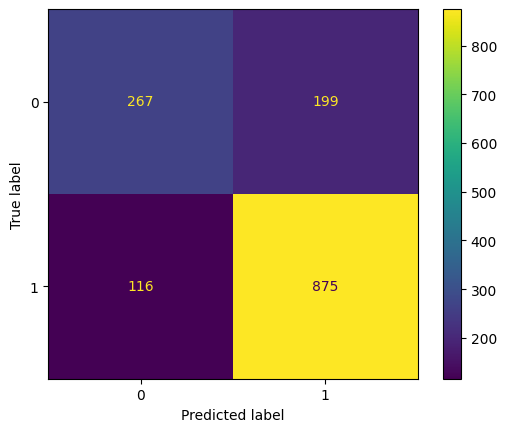

n_estimators: 200
              precision    recall  f1-score   support

           0       0.65      0.58      0.61       454
           1       0.82      0.86      0.84      1003

    accuracy                           0.77      1457
   macro avg       0.73      0.72      0.73      1457
weighted avg       0.77      0.77      0.77      1457



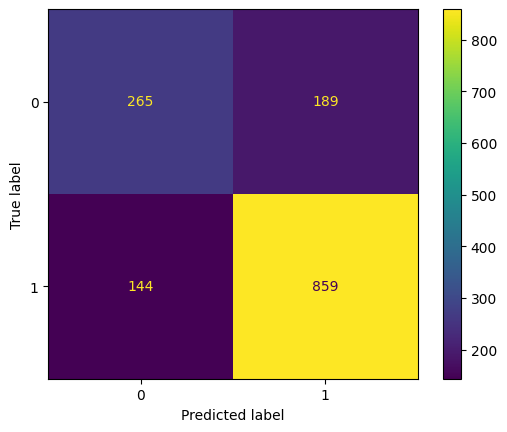

n_estimators: 200
              precision    recall  f1-score   support

           0       0.68      0.57      0.62       490
           1       0.80      0.86      0.83       967

    accuracy                           0.77      1457
   macro avg       0.74      0.72      0.73      1457
weighted avg       0.76      0.77      0.76      1457



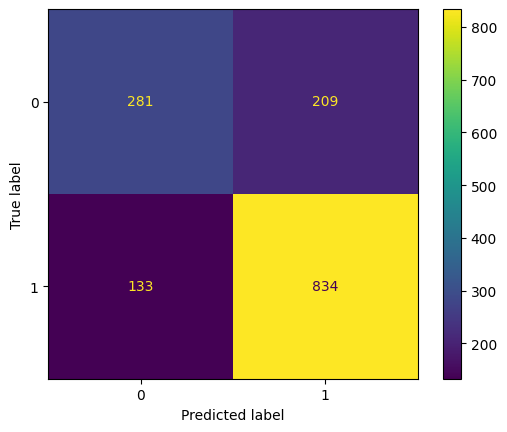

n_estimators: 200
              precision    recall  f1-score   support

           0       0.68      0.60      0.64       464
           1       0.82      0.87      0.84       992

    accuracy                           0.78      1456
   macro avg       0.75      0.73      0.74      1456
weighted avg       0.78      0.78      0.78      1456



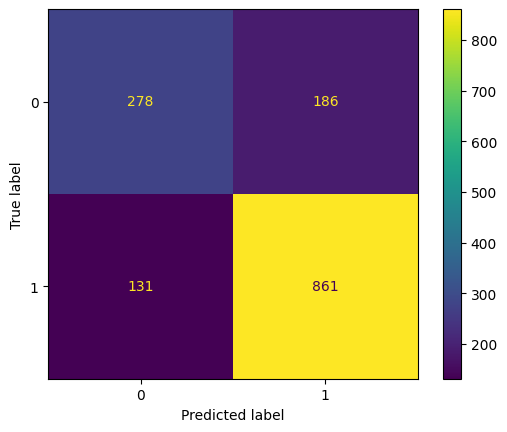

n_estimators: 400
              precision    recall  f1-score   support

           0       0.69      0.59      0.63       466
           1       0.82      0.87      0.85       991

    accuracy                           0.78      1457
   macro avg       0.75      0.73      0.74      1457
weighted avg       0.78      0.78      0.78      1457



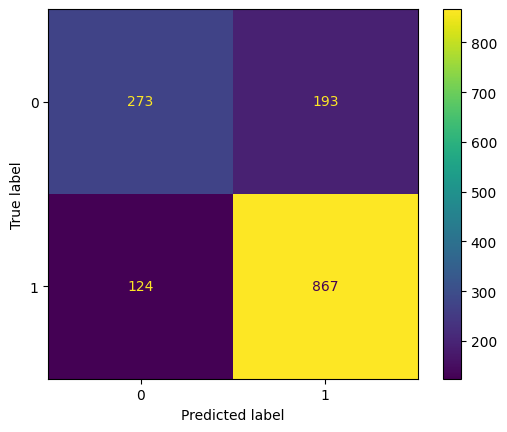

n_estimators: 400
              precision    recall  f1-score   support

           0       0.66      0.60      0.63       454
           1       0.83      0.86      0.84      1003

    accuracy                           0.78      1457
   macro avg       0.74      0.73      0.73      1457
weighted avg       0.77      0.78      0.77      1457



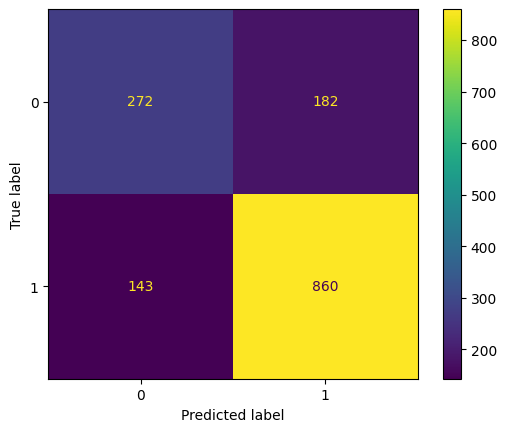

n_estimators: 400
              precision    recall  f1-score   support

           0       0.68      0.59      0.63       490
           1       0.80      0.86      0.83       967

    accuracy                           0.77      1457
   macro avg       0.74      0.72      0.73      1457
weighted avg       0.76      0.77      0.76      1457



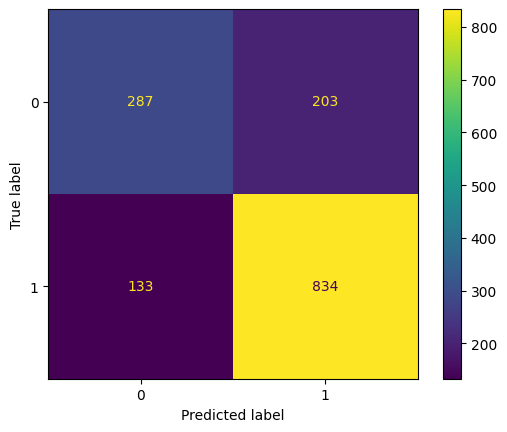

n_estimators: 400
              precision    recall  f1-score   support

           0       0.67      0.60      0.63       464
           1       0.82      0.86      0.84       992

    accuracy                           0.78      1456
   macro avg       0.75      0.73      0.74      1456
weighted avg       0.77      0.78      0.78      1456



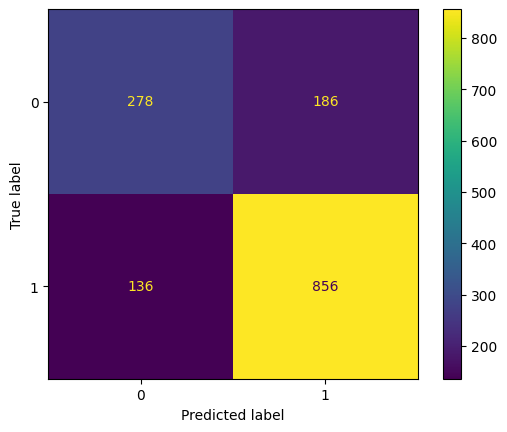

n_estimators: 600
              precision    recall  f1-score   support

           0       0.67      0.58      0.62       466
           1       0.81      0.87      0.84       991

    accuracy                           0.78      1457
   macro avg       0.74      0.72      0.73      1457
weighted avg       0.77      0.78      0.77      1457



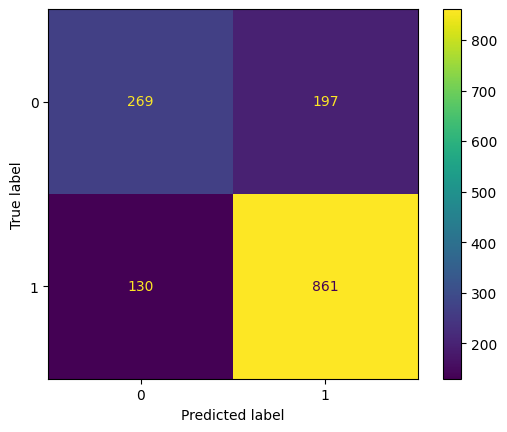

n_estimators: 600
              precision    recall  f1-score   support

           0       0.64      0.59      0.61       454
           1       0.82      0.85      0.83      1003

    accuracy                           0.77      1457
   macro avg       0.73      0.72      0.72      1457
weighted avg       0.76      0.77      0.77      1457



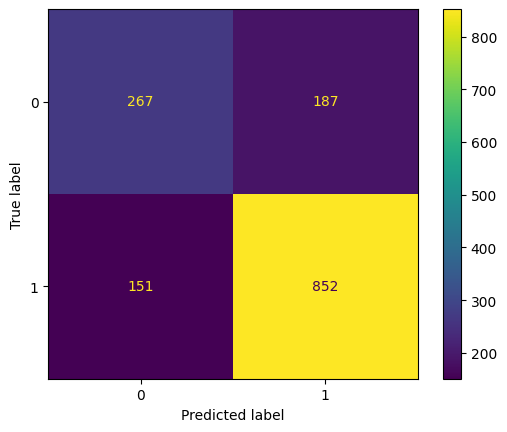

n_estimators: 600
              precision    recall  f1-score   support

           0       0.68      0.59      0.63       490
           1       0.80      0.86      0.83       967

    accuracy                           0.77      1457
   macro avg       0.74      0.72      0.73      1457
weighted avg       0.76      0.77      0.76      1457



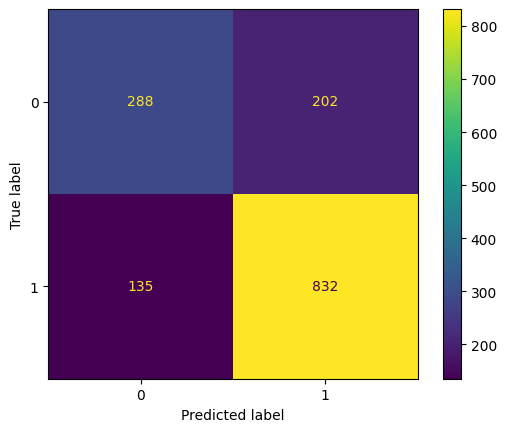

n_estimators: 600
              precision    recall  f1-score   support

           0       0.66      0.58      0.62       464
           1       0.82      0.86      0.84       992

    accuracy                           0.77      1456
   macro avg       0.74      0.72      0.73      1456
weighted avg       0.77      0.77      0.77      1456



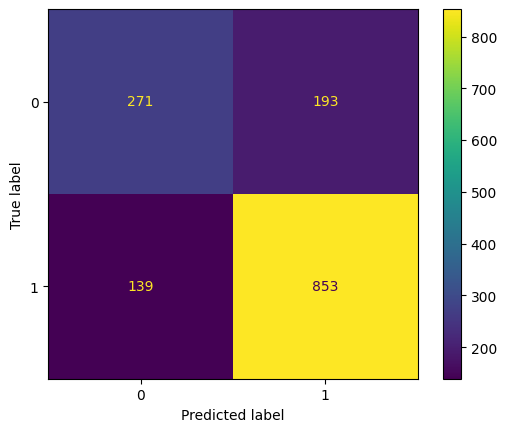

In [46]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

n_estimators_list = [200, 400, 600]
kf = KFold(n_splits=5, shuffle=True, random_state=42)
results = []

for n_estimators in n_estimators_list:
    f1_scores = []
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Définition du modèle GradientBoostingClassifier
        gradient_boosting = GradientBoostingClassifier(n_estimators=n_estimators, random_state=42)
        
        # Entraînement du modèle
        gradient_boosting.fit(X_train, y_train)
        
        # Prédiction sur les données de test
        y_pred = gradient_boosting.predict(X_test)
        
        # Calculer le F1 score
        f1 = f1_score(y_test, y_pred, average='weighted')
        f1_scores.append(f1)
        
        # Afficher le rapport de classification pour le premier split seulement (pour éviter trop de sorties)
        if train_index[0] == 0:
            print(f'n_estimators: {n_estimators}')
            print(classification_report(y_test, y_pred))
            ConfusionMatrixDisplay.from_estimator(gradient_boosting, X_test, y_test)
            plt.show()
    
    # Stocker les résultats
    results.append({'n_estimators': n_estimators, 'f1_scores': f1_scores})




# Préparer les données pour visualisation
result_df = pd.DataFrame({
    'n_estimators': np.repeat([result['n_estimators'] for result in results], kf.get_n_splits()),
    'f1_score': [score for result in results for score in result['f1_scores']]
})

# Visualiser les scores F1 pour chaque valeur de n_estimators
plt.figure(figsize=(10, 6))
sns.boxplot(x='n_estimators', y='f1_score', data=result_df, palette='viridis')
plt.xlabel('Number of Estimators')
plt.ylabel('F1 Score')
plt.title('F1 Scores for Different n_estimators')
plt.show()

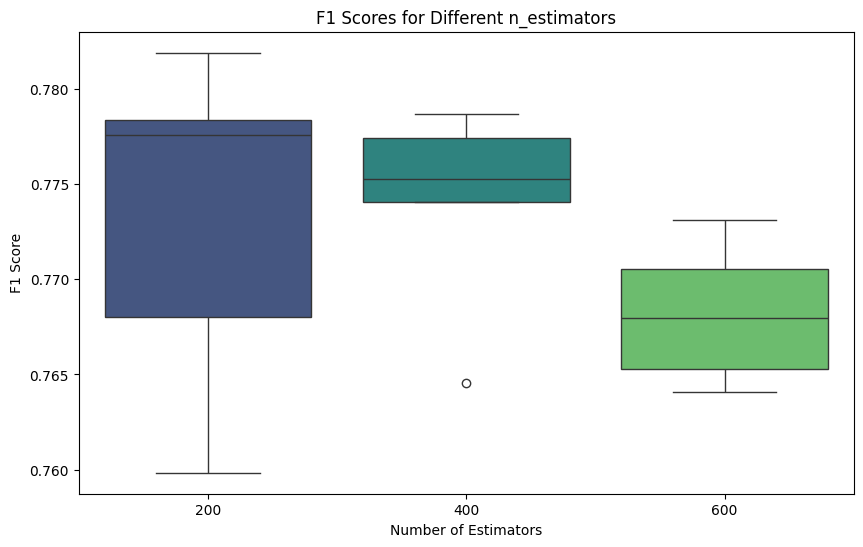

In [47]:
# Préparer les données pour visualisation
result_df = pd.DataFrame({
    'n_estimators': np.repeat([result['n_estimators'] for result in results], kf.get_n_splits()),
    'f1_score': [score for result in results for score in result['f1_scores']]
})

# Visualiser les scores F1 pour chaque valeur de n_estimators
plt.figure(figsize=(10, 6))
sns.boxplot(x='n_estimators', y='f1_score', data=result_df, palette='viridis')
plt.xlabel('Number of Estimators')
plt.ylabel('F1 Score')
plt.title('F1 Scores for Different n_estimators')
plt.show()


## <div style="text-align: left; background-color:aliceblue ; font-family: Jokerman; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Optimisation des hyperparamètres pour ExtraTreesClassifier avec GridSearchCV </div> 

In [149]:
# Définition du modèle ExtraTreesClassifier
extra_trees = ExtraTreesClassifier(random_state=42)

# Définition de la grille des hyperparamètres à rechercher
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Création de l'objet StratifiedKFold pour la validation croisée
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Création de l'objet GridSearchCV
grid_search = GridSearchCV(extra_trees, param_grid=param_grid, cv=cv, scoring='f1_score', n_jobs=-1)

# Entraînement du GridSearchCV sur les données d'entraînement
grid_search.fit(X_train, y_train.values.ravel())

# Meilleurs paramètres trouvés par GridSearchCV
best_params_extra_trees = grid_search.best_params_
print("Meilleurs paramètres pour ExtraTreesClassifier:", best_params_extra_trees)

# Meilleur score d'accuracy obtenu par GridSearchCV
best_accuracy = grid_search.best_score_
print("Meilleur score d'accuracy avec GridSearchCV:", best_accuracy)

# Entraînement du modèle ExtraTreesClassifier avec les meilleurs paramètres trouvés
best_extra_trees = ExtraTreesClassifier(**best_params_extra_trees, random_state=42)
best_extra_trees.fit(X_train, y_train.values.ravel())

# Prédiction sur les données de test
y_pred_best = best_extra_trees.predict(X_test)

# Évaluation du modèle avec les meilleurs paramètres
accuracy_best = accuracy_score(y_test, y_pred_best)
f1_macro_best = f1_score(y_test, y_pred_best) #f1_score(y_test, y_pred_best, average='macro')

print("Accuracy du meilleur ExtraTreesClassifier:", accuracy_best)
print("F1 Macro du meilleur ExtraTreesClassifier:", f1_macro_best)


Meilleurs paramètres pour ExtraTreesClassifier: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Meilleur score d'accuracy avec GridSearchCV: 0.8959374999999999
Accuracy du meilleur ExtraTreesClassifier: 0.87625
F1 Macro du meilleur ExtraTreesClassifier: 0.8762451658267901


## <div style="text-align: left; background-color:aliceblue ; font-family: Jokerman; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Optimisation des hyperparamètres pour RandomForestClassifier avec GridSearchCV </div> 

In [150]:
# Définition du modèle RandomForestClassifier
random_forest = RandomForestClassifier(random_state=42)

# Définition de la grille des hyperparamètres à rechercher
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Création de l'objet StratifiedKFold pour la validation croisée
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Création de l'objet GridSearchCV
grid_search = GridSearchCV(random_forest, param_grid=param_grid, cv=cv, scoring='f1_macro', n_jobs=-1)

# Entraînement du GridSearchCV sur les données d'entraînement
grid_search.fit(X_train, y_train.values.ravel())

# Meilleurs paramètres trouvés par GridSearchCV
best_params_rfc = grid_search.best_params_
print("Meilleurs paramètres pour RandomForestClassifier:", best_params_rfc)

# Meilleur score de F1 Macro obtenu par GridSearchCV
best_f1_macro = grid_search.best_score_
print("Meilleur score de F1 Macro avec GridSearchCV:", best_f1_macro)

# Entraînement du modèle RandomForestClassifier avec les meilleurs paramètres trouvés
best_random_forest = RandomForestClassifier(**best_params_rfc, random_state=42)
best_random_forest.fit(X_train, y_train.values.ravel())

# Prédiction sur les données de test
y_pred_best = best_random_forest.predict(X_test)

# Évaluation du modèle avec les meilleurs paramètres
accuracy_best = accuracy_score(y_test, y_pred_best)
f1_macro_best = f1_score(y_test, y_pred_best) #f1_score(y_test, y_pred_best, average='macro')

print("Accuracy du meilleur RandomForestClassifier:", accuracy_best)
print("F1 Macro du meilleur RandomForestClassifier:", f1_macro_best)

Meilleurs paramètres pour XGBClassifier: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 400}
Meilleur score avec GridSearchCV: 0.8934374999999999
Accuracy du XGBClassifier optimisé : 0.8825
F1 score macro du XGBClassifier optimisé : 0.8824970624265607


## <div style="text-align: left; background-color:aliceblue ; font-family: jokerman; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> VotingClassifier </div>

## Voting Classifier

Le Voting Classifier est une technique d'ensemble (ensemble learning) en apprentissage automatique où plusieurs modèles sont combinés pour obtenir des prédictions plus robustes et précises. 

### Types de Voting :

Il existe deux principaux types de Voting dans un Voting Classifier :

- **Hard Voting** : Dans ce type, chaque modèle de sous-classification donne une seule prédiction (le vote "dur") et la classe prédite est déterminée par le vote majoritaire parmi tous les modèles.
  
- **Soft Voting** : Dans ce type, chaque modèle de sous-classification donne une probabilité pour chaque classe (le vote "doux") et la classe prédite est déterminée par la moyenne pondérée des probabilités de tous les modèles.

### Avantages du Voting Classifier :

- **Amélioration de la performance** : Le Voting Classifier combine les forces de plusieurs modèles, ce qui peut conduire à une meilleure performance globale.
  
- **Robustesse** : En combinant différents types de modèles, le Voting Classifier peut être plus robuste aux erreurs de modélisation individuelles.

### Illustration du Voting Classifier :

<!-- Redimensionner l'image à une largeur de 500 pixels et une hauteur de 300 pixels -->
<img src="the-voting-classifier.png" alt="Illustration du Voting Classifier" width="700" height="400">

Dans l'image ci-dessus, nous voyons un exemple visuel du fonctionnement du Voting Classifier. Chaque modèle de sous-classification (représenté par les boîtes grises) donne une prédiction, et ensuite, selon le type de Voting (dur ou doux), les votes sont combinés pour produire une prédiction finale (représentée par la flèche verte).

Le Voting Classifier est un outil puissant en machine learning, permettant de combiner intelligemment les prédictions de plusieurs modèles pour obtenir des résultats plus fiables et précis.


In [166]:
from sklearn.ensemble import VotingClassifier

# Création des modèles avec les meilleurs paramètres
model1 = GradientBoostingClassifier(**best_params_gbcl)
model2 = ExtraTreesClassifier(**best_params_extra_trees)
model3 = RandomForestClassifier(**best_params_rfc)

# Création du VotingClassifier avec voting='soft'
voting_soft = VotingClassifier(estimators=[('gbcl', model1), ('etcl', model2), ('rfc', model3)], voting='soft')
voting_soft.fit(X_train, y_train)

# Prédictions avec voting='soft'
y_pred_soft = voting_soft.predict(X_test)

# Calcul des métriques avec voting='soft'
accuracy_soft = accuracy_score(y_test, y_pred_soft)
f1_macro_soft = f1_score(y_test, y_pred_soft) #f1_score(y_test, y_pred_soft, average='macro')

# Création du VotingClassifier avec voting='hard'
voting_hard = VotingClassifier(estimators=[('gbcl', model1), ('etcl', model2), ('rfc', model3)], voting='hard')
voting_hard.fit(X_train, y_train)

# Prédictions avec voting='hard'
y_pred_hard = voting_hard.predict(X_test)

# Calcul des métriques avec voting='hard'
accuracy_hard = accuracy_score(y_test, y_pred_hard)
f1_macro_hard = f1_score(y_test, y_pred_hard) #f1_score(y_test, y_pred_hard, average='macro')

# Affichage des résultats
print("Accuracy du VotingClassifier avec voting='soft' :", accuracy_soft)
print("F1 Macro du VotingClassifier avec voting='soft' :", f1_macro_soft)
print()
print("Accuracy du VotingClassifier avec voting='hard':", accuracy_hard)
print("F1 Macro du VotingClassifier avec voting='hard':", f1_macro_hard)


Accuracy du VotingClassifier avec voting='soft' : 0.88125
F1 Macro du VotingClassifier avec voting='soft' : 0.8812186342956188

Accuracy du VotingClassifier avec voting='hard': 0.88375
F1 Macro du VotingClassifier avec voting='hard': 0.8837454588069846


### Performance du VotingClassifier

#### Soft Voting

- **Accuracy :** 88.125%
- **F1 Macro :** 88.122%

Le VotingClassifier avec un mode de vote 'soft' a une précision (accuracy) de 88.125% et une F1 Macro de 88.122%. Cela suggère une performance solide du modèle en utilisant le mode de vote 'soft', indiquant une bonne capacité à généraliser sur de nouvelles données. Le mode de vote 'soft' est souvent efficace lorsque les modèles de base ont des sorties de probabilité intermédiaires intéressantes à combiner.

#### Hard Voting

- **Accuracy :** 88.375%
- **F1 Macro :** 88.375%

Le VotingClassifier avec un mode de vote 'hard' présente une précision (accuracy) de 88.375% et une F1 Macro de 88.375%. Ces performances sont légèrement supérieures à celles du mode 'soft', ce qui indique que le mode de vote 'hard' peut mieux fonctionner dans ce cas particulier. Le mode de vote 'hard' prend simplement la décision de la majorité, ce qui peut être avantageux lorsque les modèles de base ont des performances similaires.

Globalement, les deux modes de vote montrent des performances très proches. Cela suggère que les modèles individuels (ExtraTreesClassifier, KNeighborsClassifier et XGBClassifier) ont des performances comparables sur cet ensemble de données, ce qui conduit à des performances de VotingClassifier similaires pour les deux modes de vote.

Ces résultats indiquent que votre modèle de VotingClassifier est capable de bien généraliser sur de nouvelles données, avec une précision et une F1 Macro solides, que ce soit en utilisant le mode de vote 'soft' ou 'hard'. Vous pouvez être confiant dans l'utilisation de ce modèle pour vos tâches de classification.


## Sources utilisées dans le projet :

### Pour le Voting Classifier :
- [Ensemble Modeling: Voting](https://michael-fuchs-python.netlify.app/2020/05/05/ensemble-modeling-voting/) par Michael Fuchs
- [Ensemble Voting Classifiers and Random Forests in Sci-kit Learn](https://medium.com/analytics-vidhya/ensemble-voting-classifiers-and-random-forests-in-sci-kit-learn-ed0ee6a81a12) par Analytics Vidhya
- [Hard vs Soft Voting Classifier Python Example](https://vitalflux.com/hard-vs-soft-voting-classifier-python-example/) par Vitalflux
- [What is Hard and Soft Voting in Machine Learning?](https://ilyasbinsalih.medium.com/what-is-hard-and-soft-voting-in-machine-learning-2652676b6a32) par Ilyas Bin Salih
- [Heterogeneous Ensemble Learning: Hard Voting & Soft Voting](https://www.datajango.com/heterogeneous-ensemble-learning-hard-voting-soft-voting/) par DataJango

### Pour le Splitting and Cross-validation :
- [Splitting and Cross-validation](https://bait509-ubc.github.io/BAIT509/lectures/lecture2.html) par BAIT509-UBC
